# Shareena_ML_B7_project_SpineDataset_BackPain

# Dataset_spine
**Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied Research in Orthopaedics (GARO) of the Centre médico-chirurgical de réadaptation des Massues, Lyon, France.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset_spine.csv")
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

# Data preprocessing -------------------------------------------------------------------------------

**'unnamed:13'  contains informartion about this dataset such as name of each attribute of each column.so after modifing dataset we can delete column unnamed:13**

In [3]:
df["Unnamed: 13"].unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

### Change the Column names

In [4]:
df.rename(columns = {"Col1" : "pelvic_incidence", "Col2" : "pelvic_tilt","Col3" : "lumbar_lordosis_angle",
                     "Col4" : "sacral_slope", "Col5" : "pelvic_radius","Col6" : "degree_spondylolisthesis", 
                     "Col7" : "pelvic_slope","Col8" : "direct_tilt","Col9" : "thoracic_slope",
                     "Col10" :"cervical_tilt", "Col11" : "sacrum_angle","Col12" : "scoliosis_slope", 
                     "Class_att" : "Spine_Condition"}, inplace=True)

df.head(3)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  \
0         14.5386       15.30468    -28.658501          43.5123   
1         17.5323       16.78486    -25.530607          16.1102   
2         17.4861       16.65897    -29.031888          19.2221   

  Spine_Condition                                        Unnamed: 13  
0        Abnormal                                                NaN  
1        Abnormal                                                NaN  
2        Abnormal  Prediction is done by using binary classificat...

### Drop the Column named 'Unnamed: 13'

In [5]:
df.drop('Unnamed: 13', inplace=True, axis=1)
df.head(3)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  \
0         14.5386       15.30468    -28.658501          43.5123   
1         17.5323       16.78486    -25.530607          16.1102   
2         17.4861       16.65897    -29.031888          19.2221   

  Spine_Condition  
0        Abnormal  
1        Abnormal  
2        Abnormal

### Target attribute = Spine_Conditions

In [6]:
df['Spine_Condition'].value_counts()

Abnormal    210
Normal      100
Name: Spine_Condition, dtype: int64

### Dataset overview

### Rows,columns and features list

In [7]:
print ("No of rows in dataset     =  " ,df.shape[0])
print ("No of Columns in dataset  =  " ,df.shape[1])

No of rows in dataset     =   310
No of Columns in dataset  =   13


In [8]:
print('Features in dataset')
print('===================')
df.columns.tolist()

Features in dataset


['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope',
 'Spine_Condition']

### Information about a DataFrame

In [9]:
print('Information about a DataFrame')
print('=============================')
df.info()

Information about a DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Spine_Condition           310 non-null    object 
dtypes: float64(12), object(1)
memory us

In [10]:
print("The number of continuous Variables are:- ",len(list(df.describe().columns)))
print("The number of Categorical Variables are:- ",len(df.select_dtypes(include=['object']).columns))

The number of continuous Variables are:-  12
The number of Categorical Variables are:-  1


### Missing values

In [11]:
print("Missing values : \n",df.isnull().sum())
print('----------------------------')
print ("Total Missing values in the data set =  ", df.isnull().sum().sum())

Missing values : 
 pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Spine_Condition             0
dtype: int64
----------------------------
Total Missing values in the data set =   0


### Finding the special characters in the data frame

In [12]:
print('If there is any special characters such as ?')
print('==================================')
print(df.isin(['?']).sum(axis=0))
print('----------------------------------')
print ("Total special characters in the data set =  ", df.isnull().sum().sum())

If there is any special characters such as ?
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Spine_Condition             0
dtype: int64
----------------------------------
Total special characters in the data set =   0


### catagorical column list

In [13]:
df.select_dtypes(include=['object']).columns.tolist()

['Spine_Condition']

### numeric column list

In [14]:
df.select_dtypes(include=np.number).columns.tolist()

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope']

### Scaling- MinMaxScaler
### ---------------------------------

- MinMaxScaler-Scales the data using the max and min values so that it fits between 0 and 1.

In [15]:
df.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  \
0         14.5386       15.30468    -28.658501          43.5123   
1         17.5323       16.78486    -25.530607          16.1102   

  Spine_Condition  
0        Abnormal  
1        Abnormal

In [16]:
X=df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
 'pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0       0.307461                  0.025148      0.744554     0.186396   
1       0.476649                  0.036365      0.413783     0.197208   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0        0.610506       0.845115      0.156861         0.977797  
1        0.854170       0.996300      0.230878         0.243812

In [17]:
y=df['Spine_Condition']
df=scaled_df.join(y)
df.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0       0.307461                  0.025148      0.744554     0.186396   
1       0.476649                  0.036365      0.413783     0.197208   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  \
0        0.610506       0.845115      0.156861         0.977797   
1        0.854170       0.996300      0.230878         0.243812   

  Spine_Condition  
0        Abnormal  
1        Abnormal

# Exploratory Data Analysis --------------------------------------------------------------------

##  univariate analysis of  catagorical column
## -----------------------------------------------------------

#### Target variable = Spine_Condition

In [18]:
# count of target 
print('Target Class Distributuon')
print('-------------------------')
df['Spine_Condition'].value_counts()

Target Class Distributuon
-------------------------


Abnormal    210
Normal      100
Name: Spine_Condition, dtype: int64

<AxesSubplot:title={'center':'Frequency Distribution of Spine condition '}, xlabel='Spine_Condition', ylabel='count'>

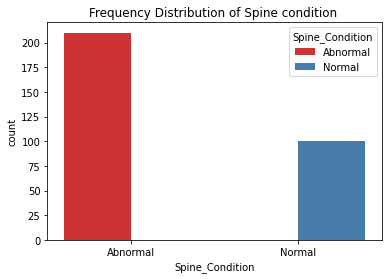

In [19]:
plt.title('Frequency Distribution of Spine condition ')
sns.countplot(x='Spine_Condition', data=df,hue='Spine_Condition', palette= 'Set1')

**Target distribution in percentage**

In [20]:
df['Spine_Condition'].value_counts()*100.0 /len(df)

Abnormal    67.741935
Normal      32.258065
Name: Spine_Condition, dtype: float64

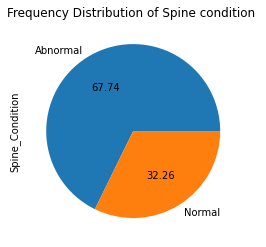

In [21]:
plt.title('Frequency Distribution of Spine condition ')
df['Spine_Condition'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

- **Dataset is not imbalanced dataset**

## univariate analysis - Numerical columns
## -------------------------------------------------------------

### All numeric datas are Continuous datas in this data set

#### histogram

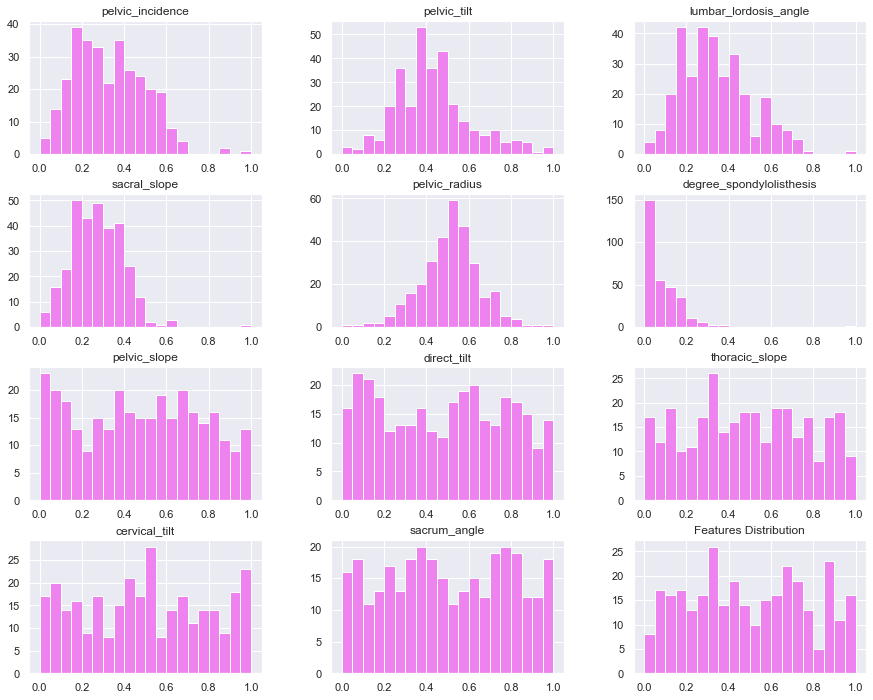

In [22]:
sns.set_theme(style='darkgrid')
df.hist(figsize=(15,12),bins = 20, color="violet")
plt.title("Features Distribution")
plt.show()

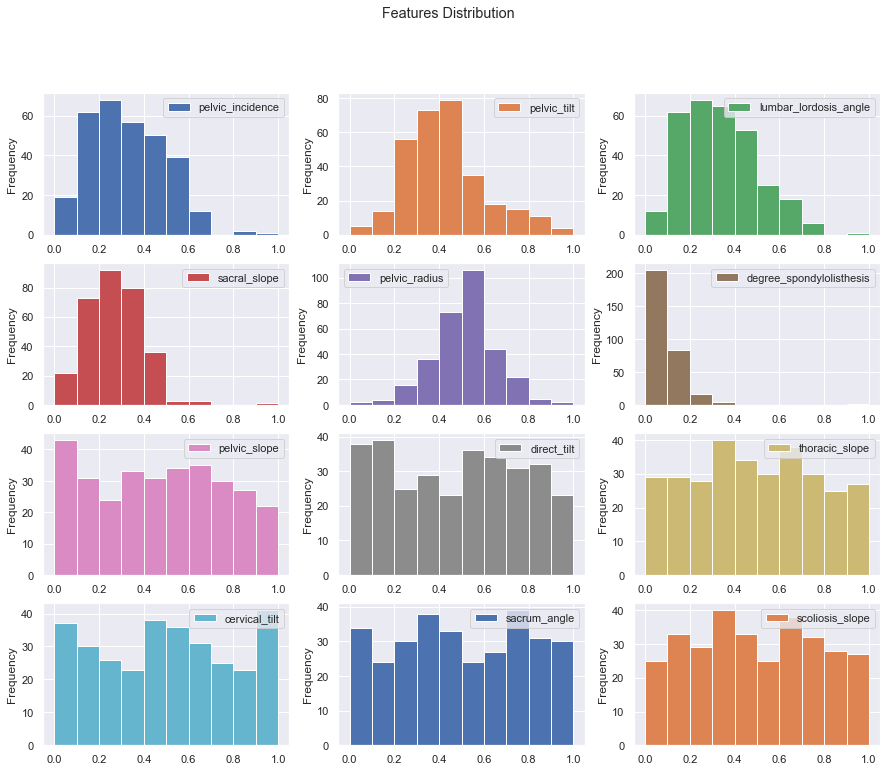

In [23]:
sns.set_theme(style='darkgrid')
df.plot(kind='hist', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12),title = "Features Distribution")
plt.show()

- **The data are numerical.We can see the shape of the data’s distribution, especially when determining whether the output of a process is distributed approximately normally.**
---
- **'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius' are some what normally distributed**
- **degree_spondylolisthesis  right skewed**
---
- **'pelvic_slope','direct_tilt','thoracic_slope', 'cervical_tilt','sacrum_angle','scoliosis_slope' areA randomly distributed .**

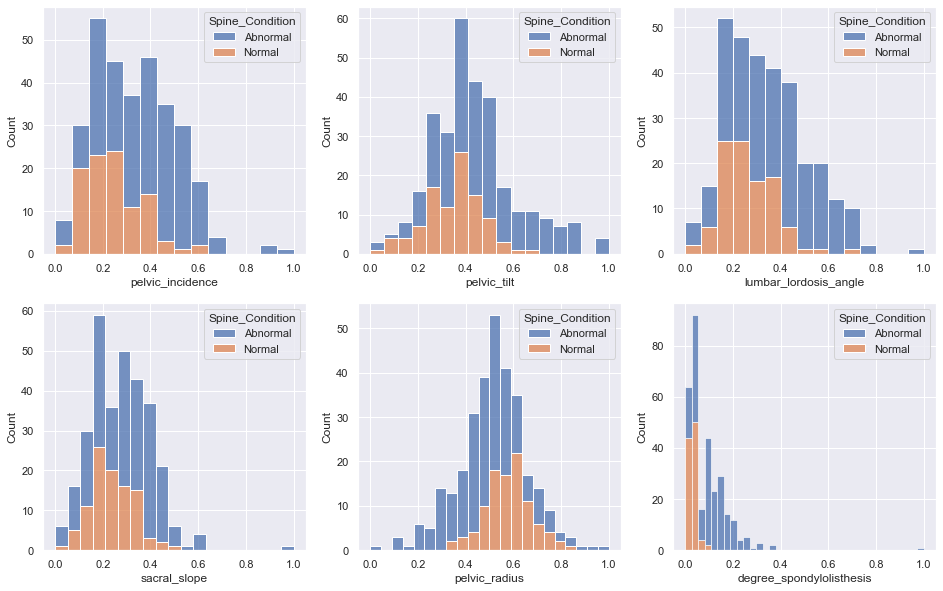

In [24]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(2,3,figsize=(16,10))
sns.histplot(data=df,x='pelvic_incidence', hue='Spine_Condition', multiple="stack", ax=ax[0][0])
sns.histplot(data=df,x='pelvic_tilt', hue='Spine_Condition', multiple="stack", ax=ax[0][1])
sns.histplot(data=df,x='lumbar_lordosis_angle', hue='Spine_Condition', multiple="stack", ax=ax[0][2])
sns.histplot(data=df,x='sacral_slope', hue='Spine_Condition', multiple="stack", ax=ax[1][0]) 
sns.histplot(data=df,x='pelvic_radius', hue='Spine_Condition', multiple="stack", ax=ax[1][1])
sns.histplot(data=df,x='degree_spondylolisthesis', hue='Spine_Condition', multiple="stack", ax=ax[1][2])
plt.show()

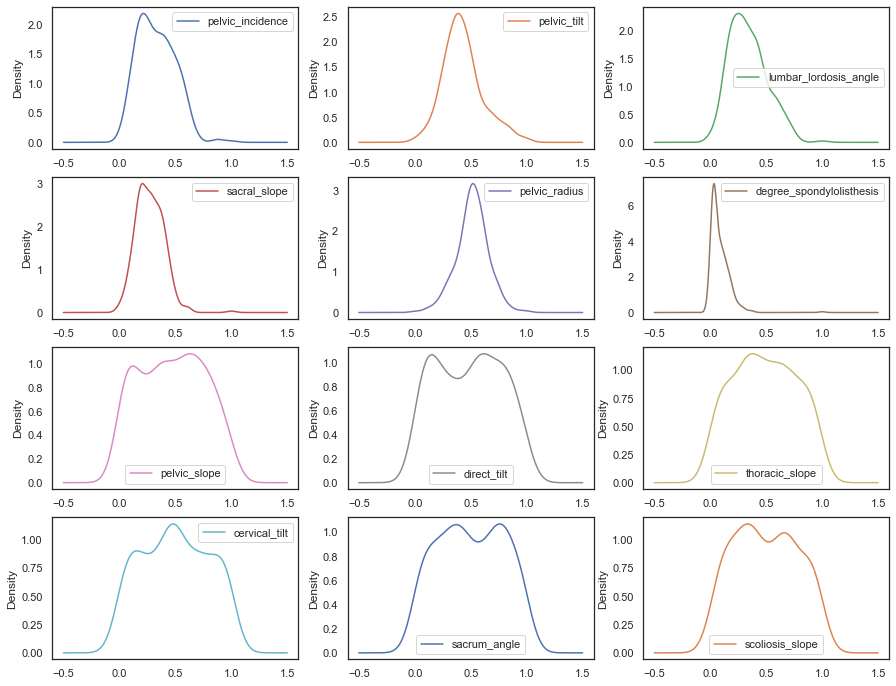

In [25]:
sns.set_theme(style='white')
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12))
plt.show()

- **Density plots are used to observe the distribution of a variable in a dataset.The peaks of a Density Plot help display where values are concentrated over the interval.**
---
- **from this we can see that 'pelvic_tilt','pelvic_radius' are perfectly normal distributed.**
- **'pelvic_incidence','lumbar_lordosis_angle','sacral_slope' are some what normally distributed**
- **other columns others are not at all normally distributed.**
---
- **degree_spondylolisthesis  right skewed or positively skewed. That means major collected datas are greater than 0**
---
- **'direct_tilt','sacrum_angle','scoliosis_slope'The bimodal distribution looks like the back of a two-humped camel.that means Double-Peaked or Bimodal distribution**

## Bivariate analysis -----------------------------------------------------
### For Quantitative vs Quantitative we can use Scatterplot and Regplot.
---

### Sctatter plot and regplot (pelvic_incidence v/s other variables)

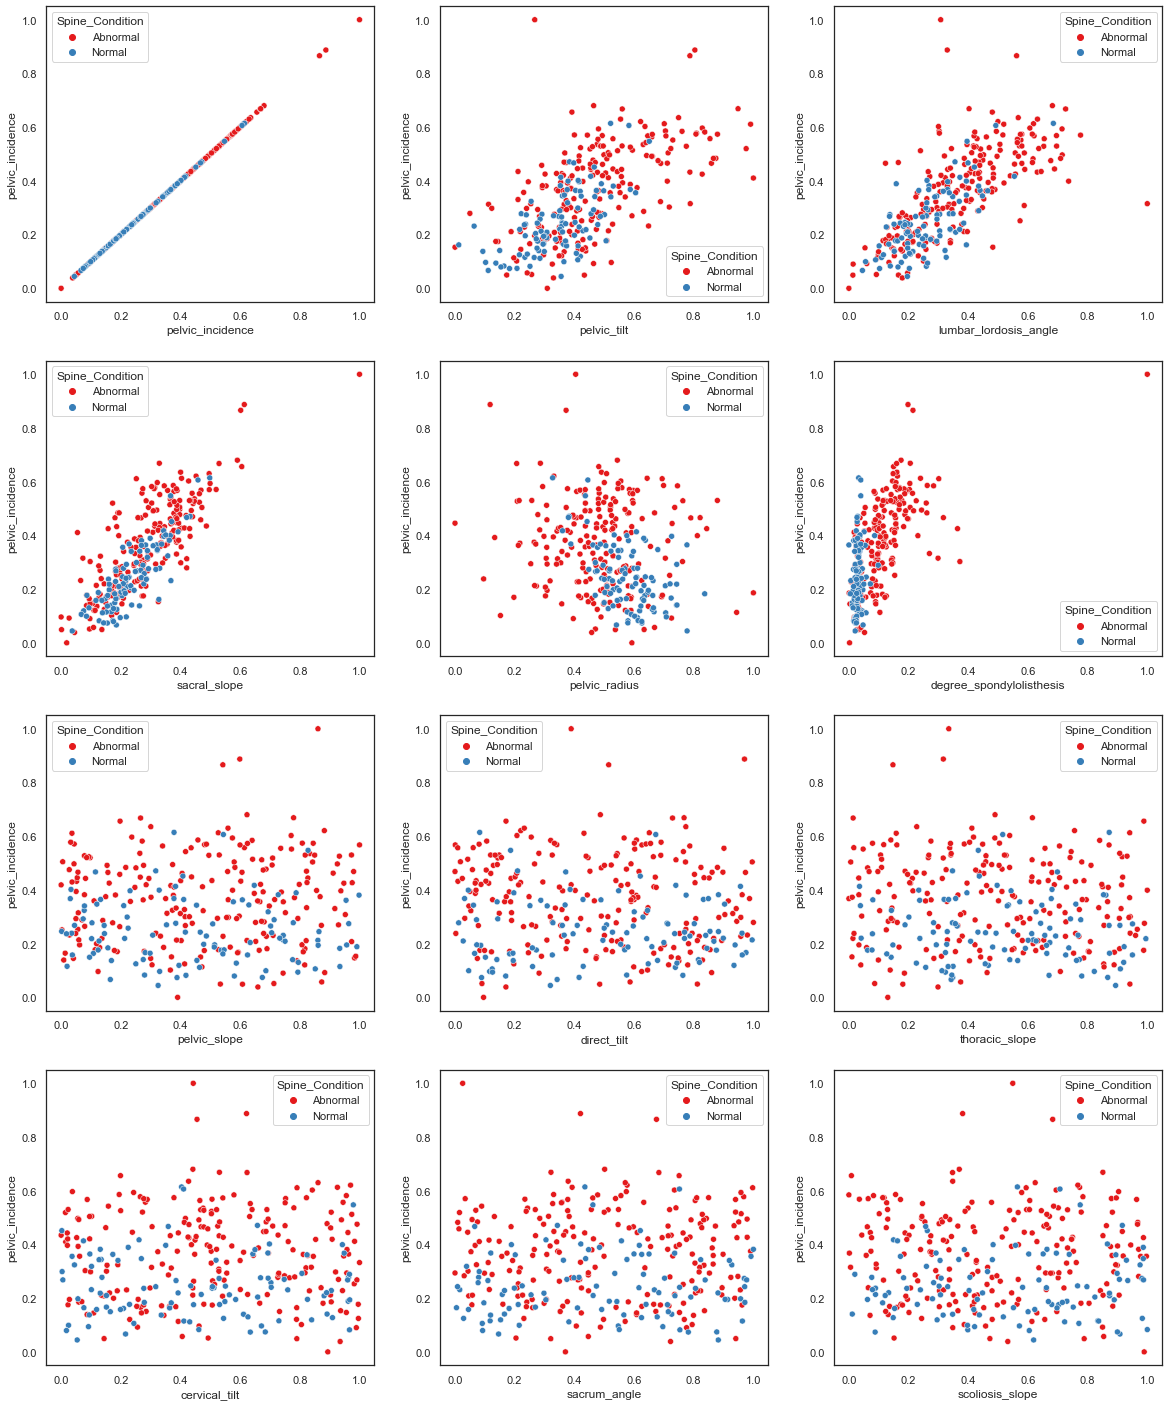

In [26]:
sns.set_theme(style='white')
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set1')

sns.scatterplot(data=df,ax=ax[0][0],y='pelvic_incidence', hue='Spine_Condition',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='pelvic_incidence', hue='Spine_Condition',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='pelvic_incidence', hue='Spine_Condition',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='pelvic_incidence', hue='Spine_Condition',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='pelvic_incidence', hue='Spine_Condition',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='pelvic_incidence', hue='Spine_Condition',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='pelvic_incidence', hue='Spine_Condition',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='pelvic_incidence', hue='Spine_Condition',x='direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='pelvic_incidence', hue='Spine_Condition',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='pelvic_incidence', hue='Spine_Condition',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='pelvic_incidence', hue='Spine_Condition',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='pelvic_incidence', hue='Spine_Condition',x='scoliosis_slope')

plt.show()

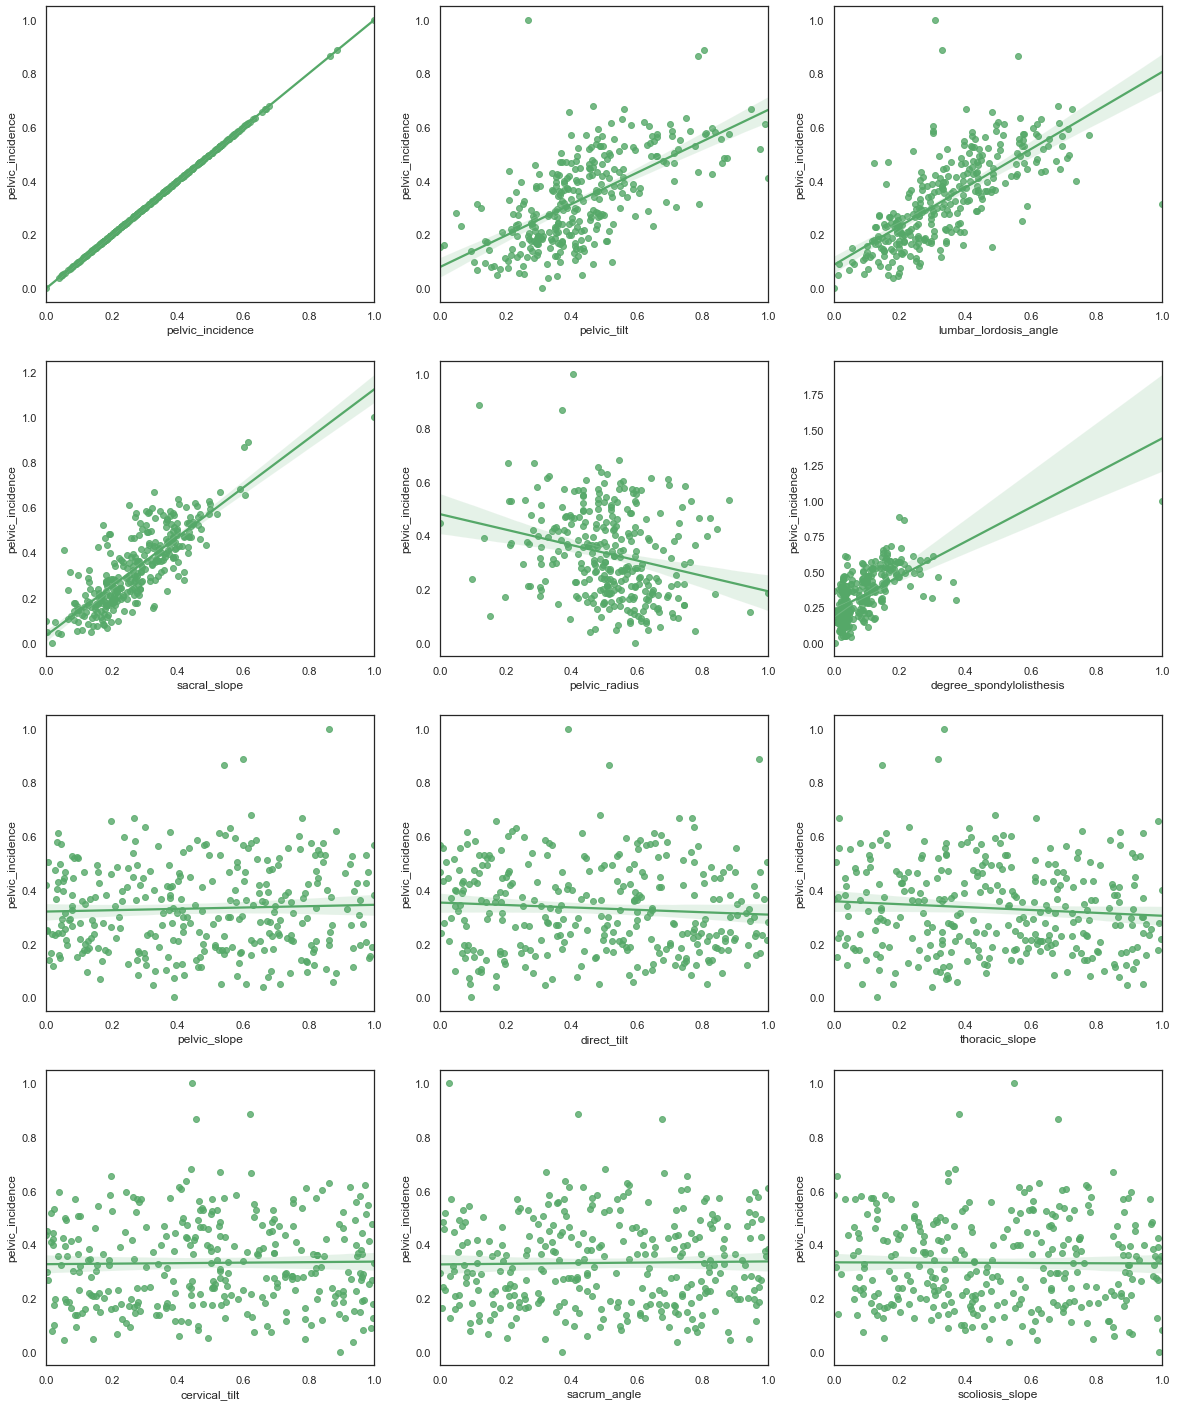

In [27]:
sns.set_theme(style='white')
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_incidence', color="g",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_incidence', color="g",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_incidence', color="g",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_incidence', color="g",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_incidence', color="g",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_incidence', color="g",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_incidence', color="g",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_incidence', color="g",x='direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_incidence', color="g",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_incidence', color="g",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_incidence', color="g",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_incidence', color="g",x='scoliosis_slope')

plt.show()

- **positive relationship between 'pelvic_incidence' and 'pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis'.**
- **negative relationship between 'pelvic_incidence' and 'pelvic_radius'**
- **N0 significant relationship between 'pelvic_incidence' andother columns.**

### Sctatter plot and regplot (pelvic_tilt  v/s other variables)

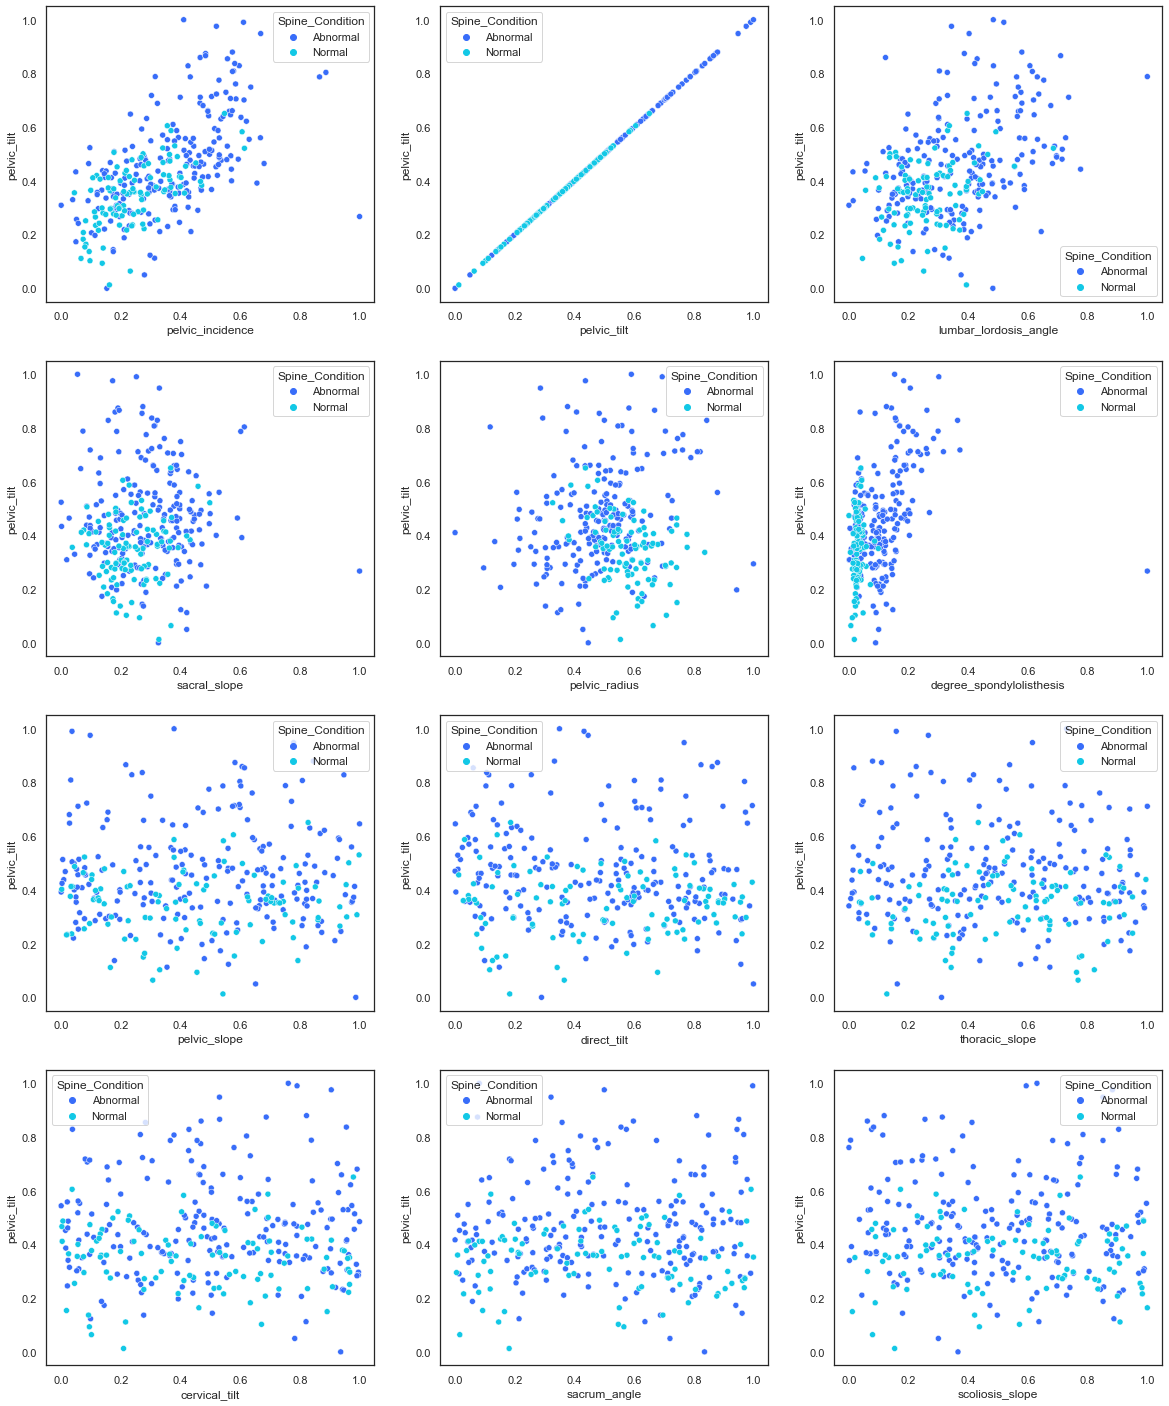

In [28]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('rainbow')

sns.scatterplot(data=df,ax=ax[0][0],y='pelvic_tilt', hue='Spine_Condition',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='pelvic_tilt', hue='Spine_Condition',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='pelvic_tilt', hue='Spine_Condition',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='pelvic_tilt', hue='Spine_Condition',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='pelvic_tilt', hue='Spine_Condition',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='pelvic_tilt', hue='Spine_Condition',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='pelvic_tilt', hue='Spine_Condition',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='pelvic_tilt', hue='Spine_Condition',x='direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='pelvic_tilt', hue='Spine_Condition',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='pelvic_tilt', hue='Spine_Condition',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='pelvic_tilt', hue='Spine_Condition',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='pelvic_tilt', hue='Spine_Condition',x='scoliosis_slope')

plt.show()

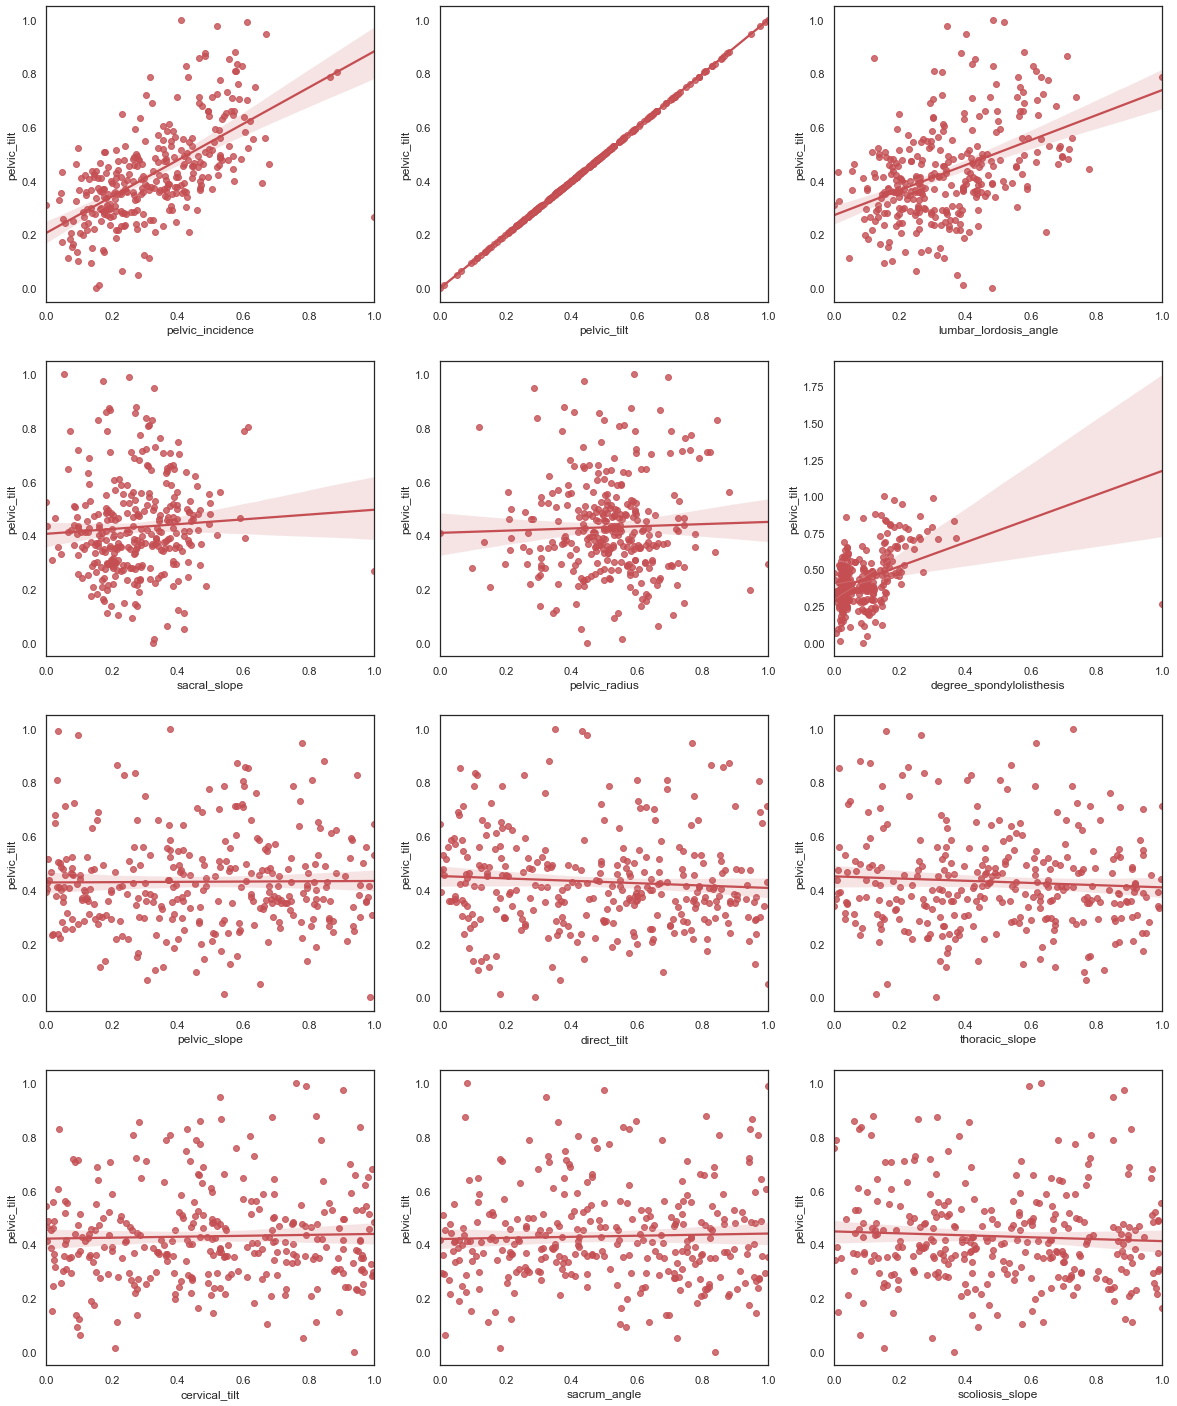

In [29]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_tilt', color="r",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_tilt', color="r",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_tilt', color="r",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_tilt', color="r",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_tilt', color="r",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_tilt', color="r",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_tilt', color="r",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_tilt', color="r",x='direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_tilt', color="r",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_tilt', color="r",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_tilt', color="r",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_tilt', color="r",x='scoliosis_slope')

plt.show()

- **positive relationship between 'pelvic_tilt' and 'pelvic_incidence','lumbar_lordosis_angle','degree_spondylolisthesis'.**
- **Very less significant positive relationship between 'pelvic_incidence' and 'pelvic_radius','sacral_slope',**
- **N0 significant relationship between 'pelvic_incidence' andother columns.**

### Sctatter plot and regplot  (lumbar_lordosis_angle v/s other variables)

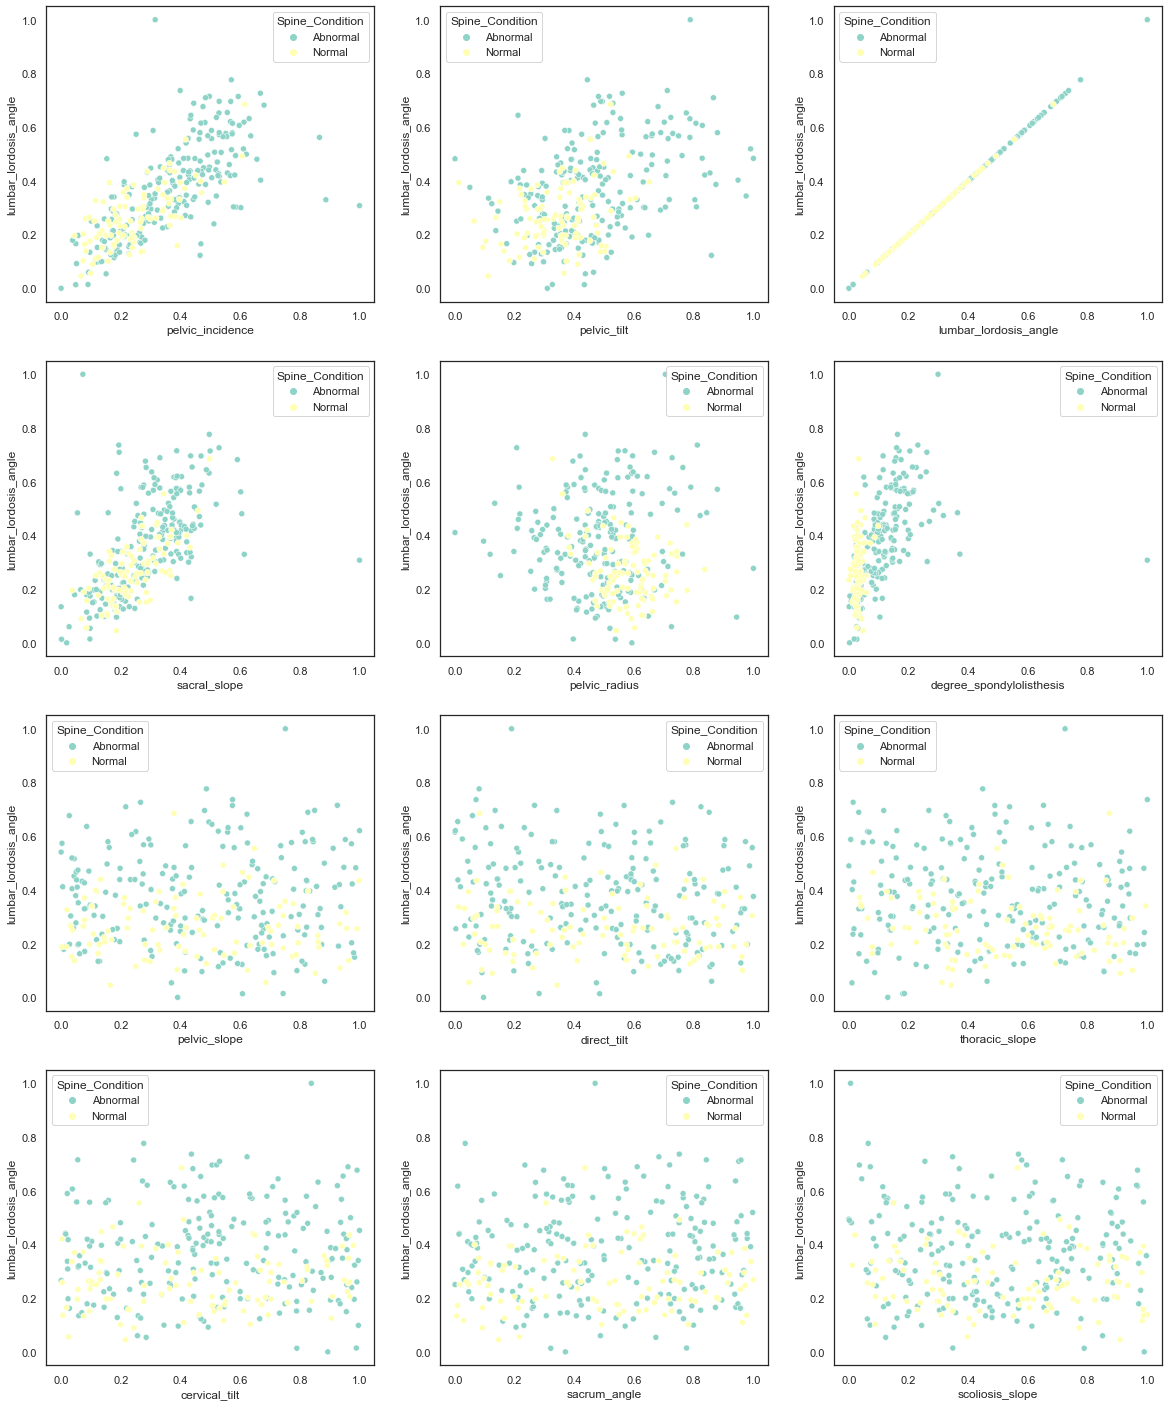

In [30]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set3')

sns.scatterplot(data=df,ax=ax[0][0],y='lumbar_lordosis_angle', hue='Spine_Condition',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='lumbar_lordosis_angle', hue='Spine_Condition',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='lumbar_lordosis_angle', hue='Spine_Condition',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='lumbar_lordosis_angle', hue='Spine_Condition',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='lumbar_lordosis_angle', hue='Spine_Condition',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='lumbar_lordosis_angle', hue='Spine_Condition',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='lumbar_lordosis_angle', hue='Spine_Condition',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='lumbar_lordosis_angle', hue='Spine_Condition',x='direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='lumbar_lordosis_angle', hue='Spine_Condition',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='lumbar_lordosis_angle', hue='Spine_Condition',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='lumbar_lordosis_angle', hue='Spine_Condition',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='lumbar_lordosis_angle', hue='Spine_Condition',x='scoliosis_slope')

plt.show()

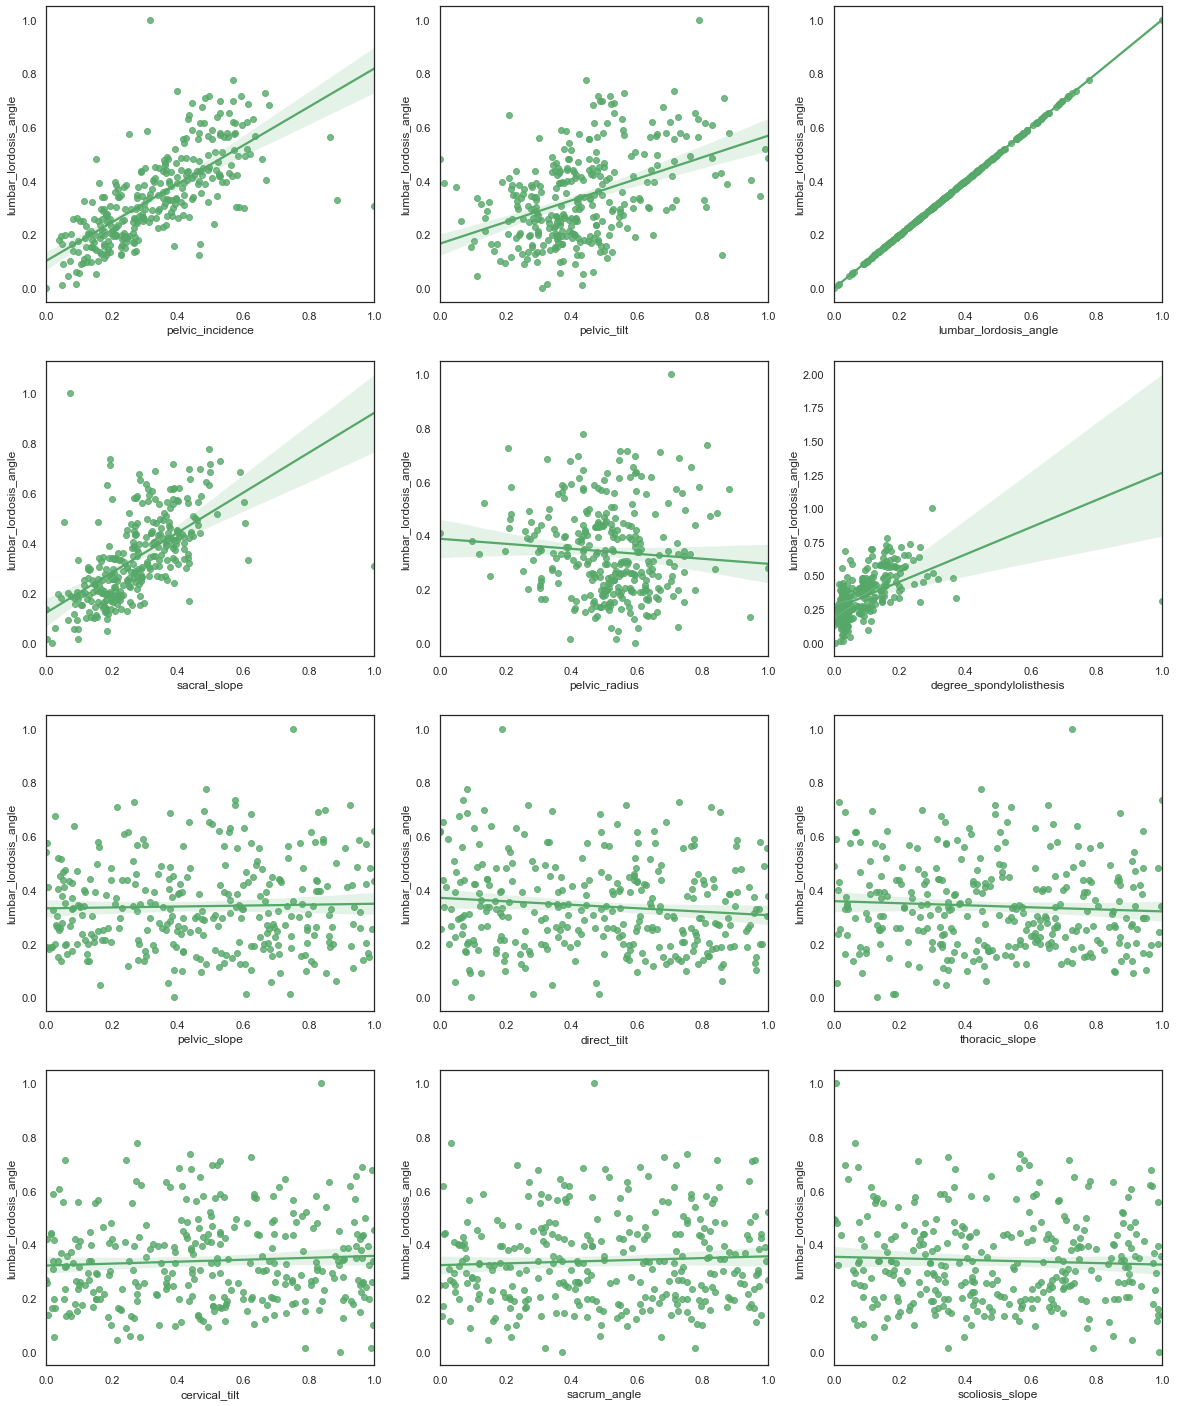

In [31]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='lumbar_lordosis_angle', color="g",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='lumbar_lordosis_angle', color="g",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='lumbar_lordosis_angle', color="g",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='lumbar_lordosis_angle', color="g",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='lumbar_lordosis_angle', color="g",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='lumbar_lordosis_angle', color="g",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='lumbar_lordosis_angle', color="g",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='lumbar_lordosis_angle', color="g",x='direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='lumbar_lordosis_angle', color="g",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='lumbar_lordosis_angle', color="g",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='lumbar_lordosis_angle', color="g",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='lumbar_lordosis_angle', color="g",x='scoliosis_slope')

plt.show()

- **positive relationship between 'lumbar_lordosis_angle' and 'pelvic_incidence','pelvic_tilt','sacral_slope','degree_spondylolisthesis'.**
- **negative relationship between 'lumbar_lordosis_angle' and 'pelvic_radius`**
- **N0 significant relationship between 'lumbar_lordosis_angle' andother columns.**

###  regplot (pelvic_radius v/s other variables)

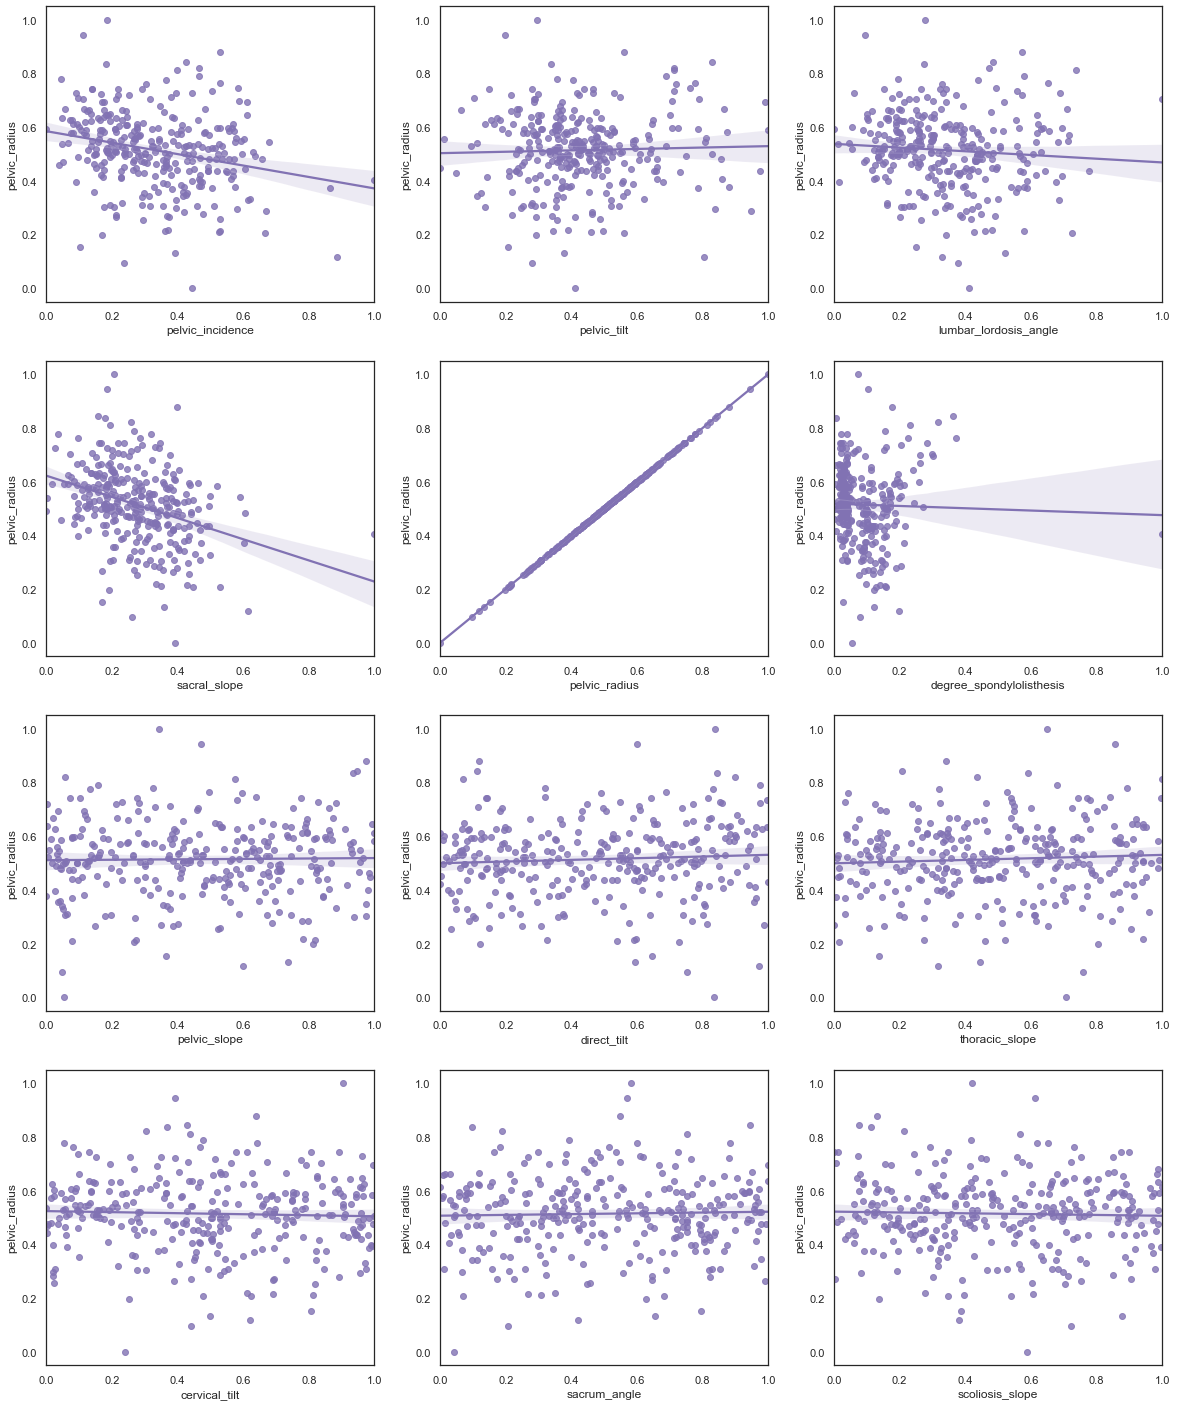

In [32]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_radius', color="m",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_radius', color="m",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_radius', color="m",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_radius', color="m",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_radius', color="m",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_radius', color="m",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_radius', color="m",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_radius', color="m",x='direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_radius', color="m",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_radius', color="m",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_radius', color="m",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_radius', color="m",x='scoliosis_slope')

plt.show()

- **negative  relationship between 'pelvic_radius' and 'pelvic_incidence','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis'.**
- **Very less significant positive relationship between 'pelvic_radius' and 'pelvic_tilt'**
- **N0 significant relationship between  'pelvic_radius' and remaining columns**

### Scatter plot (degree_spondylolisthesis v/s other variables)

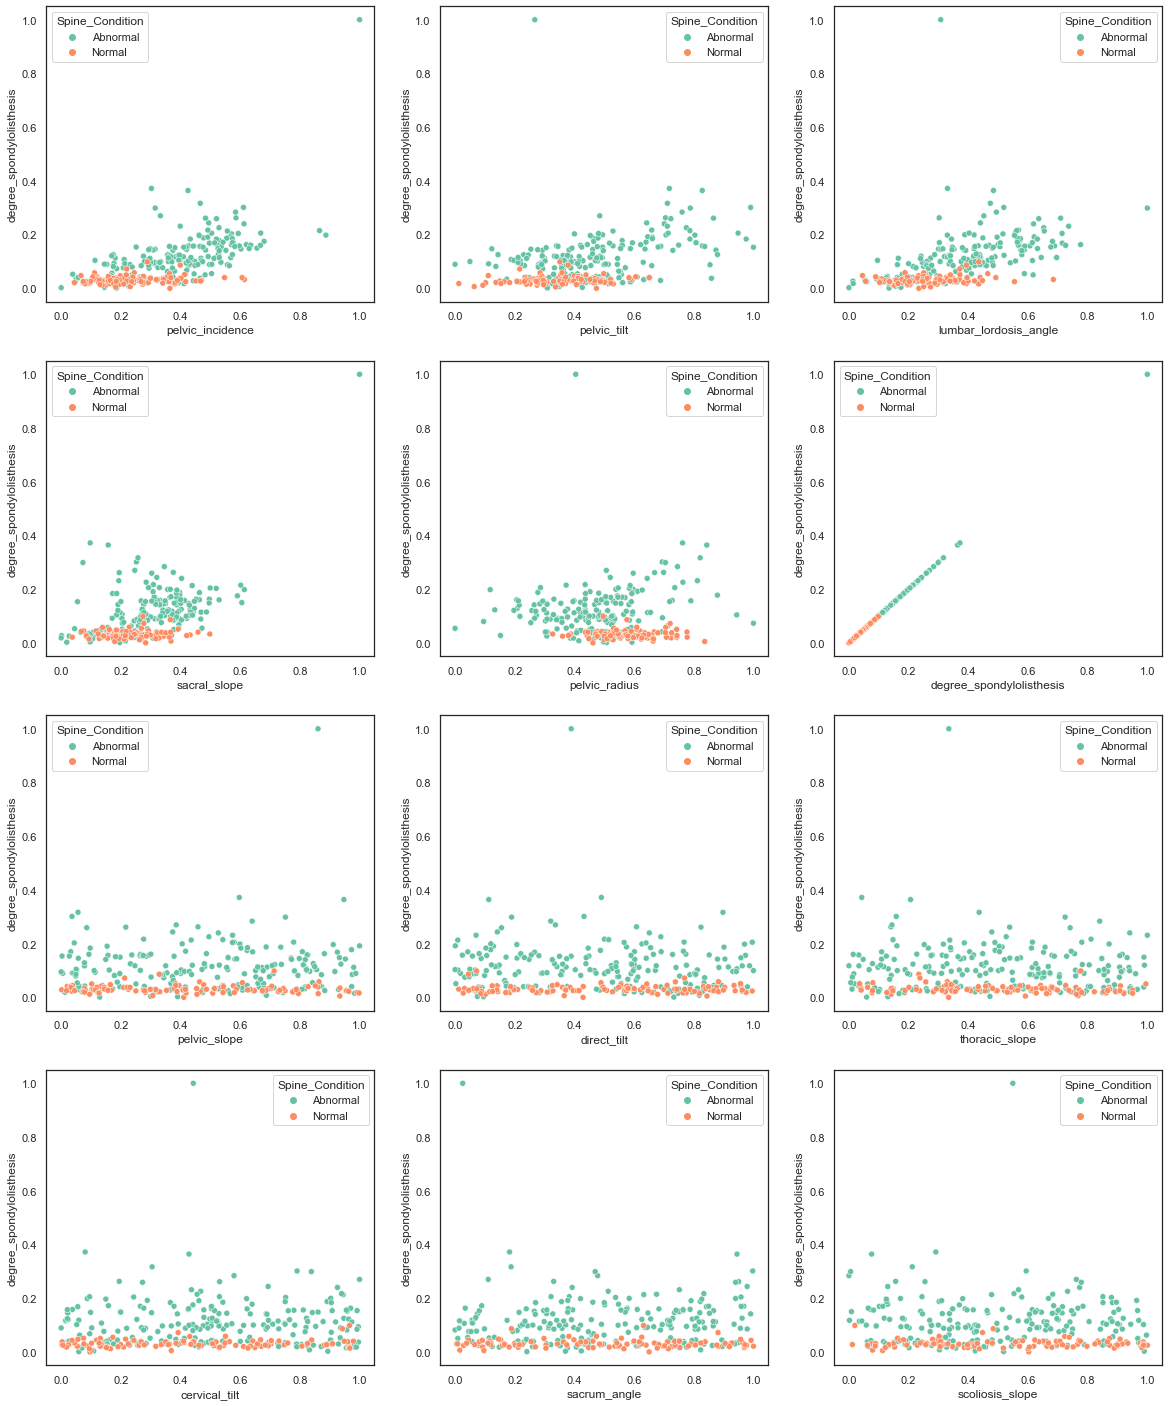

In [33]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set2')

sns.scatterplot(data=df,ax=ax[0][0],y='degree_spondylolisthesis', hue='Spine_Condition',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='degree_spondylolisthesis', hue='Spine_Condition',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='degree_spondylolisthesis', hue='Spine_Condition',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='degree_spondylolisthesis', hue='Spine_Condition',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='degree_spondylolisthesis', hue='Spine_Condition',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='degree_spondylolisthesis', hue='Spine_Condition',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='degree_spondylolisthesis', hue='Spine_Condition',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='degree_spondylolisthesis', hue='Spine_Condition',x='direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='degree_spondylolisthesis', hue='Spine_Condition',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='degree_spondylolisthesis', hue='Spine_Condition',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='degree_spondylolisthesis', hue='Spine_Condition',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='degree_spondylolisthesis', hue='Spine_Condition',x='scoliosis_slope')

plt.show()

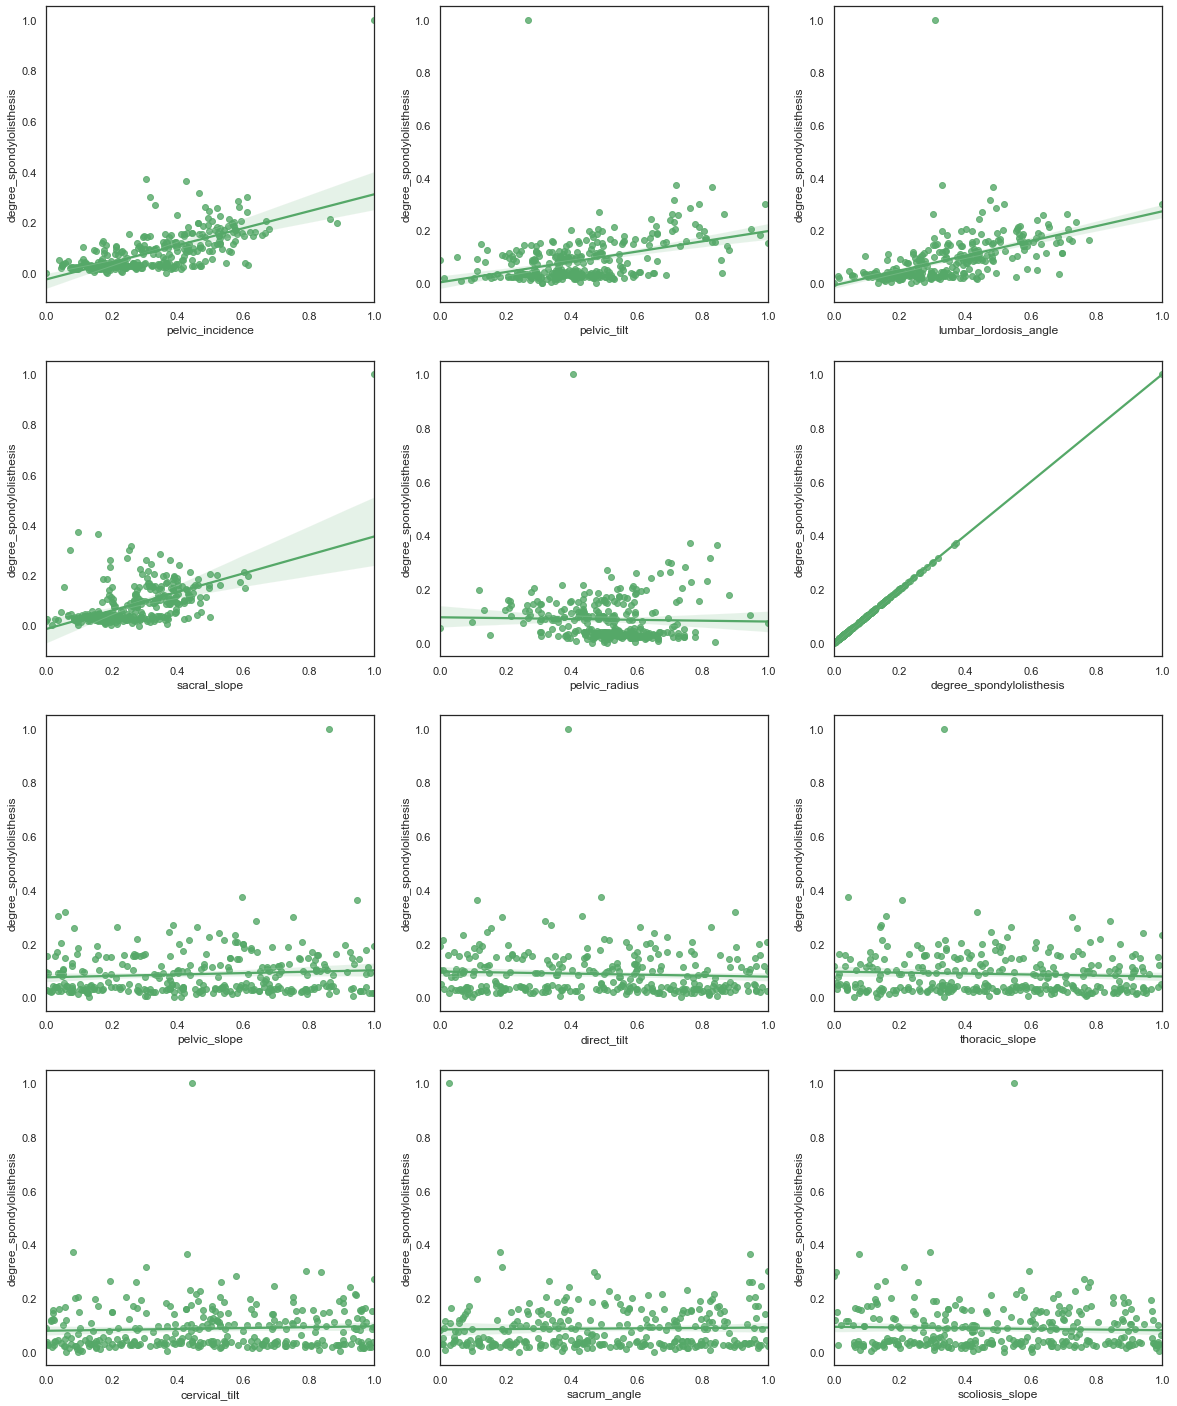

In [34]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.regplot(data=df,ax=ax[0][0],y='degree_spondylolisthesis', color="g",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='degree_spondylolisthesis', color="g",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='degree_spondylolisthesis', color="g",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='degree_spondylolisthesis', color="g",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='degree_spondylolisthesis', color="g",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='degree_spondylolisthesis', color="g",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='degree_spondylolisthesis', color="g",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='degree_spondylolisthesis', color="g",x='direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='degree_spondylolisthesis', color="g",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='degree_spondylolisthesis', color="g",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='degree_spondylolisthesis', color="g",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='degree_spondylolisthesis', color="g",x='scoliosis_slope')
plt.show()

- **positive relationship between 'degree_spondylolisthesis' and 'pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis'.**
- **negative relationship between 'degree_spondylolisthesis' and 'pelvic_radius`**
- **No significant relationship between 'degree_spondylolisthesis' andother columns.**

## Bivariate analysis - Categorical v/s Quantitative numeric we can use violin plot .
## -----------------------------------------------------------------------------------------------------------------

#### violin plot

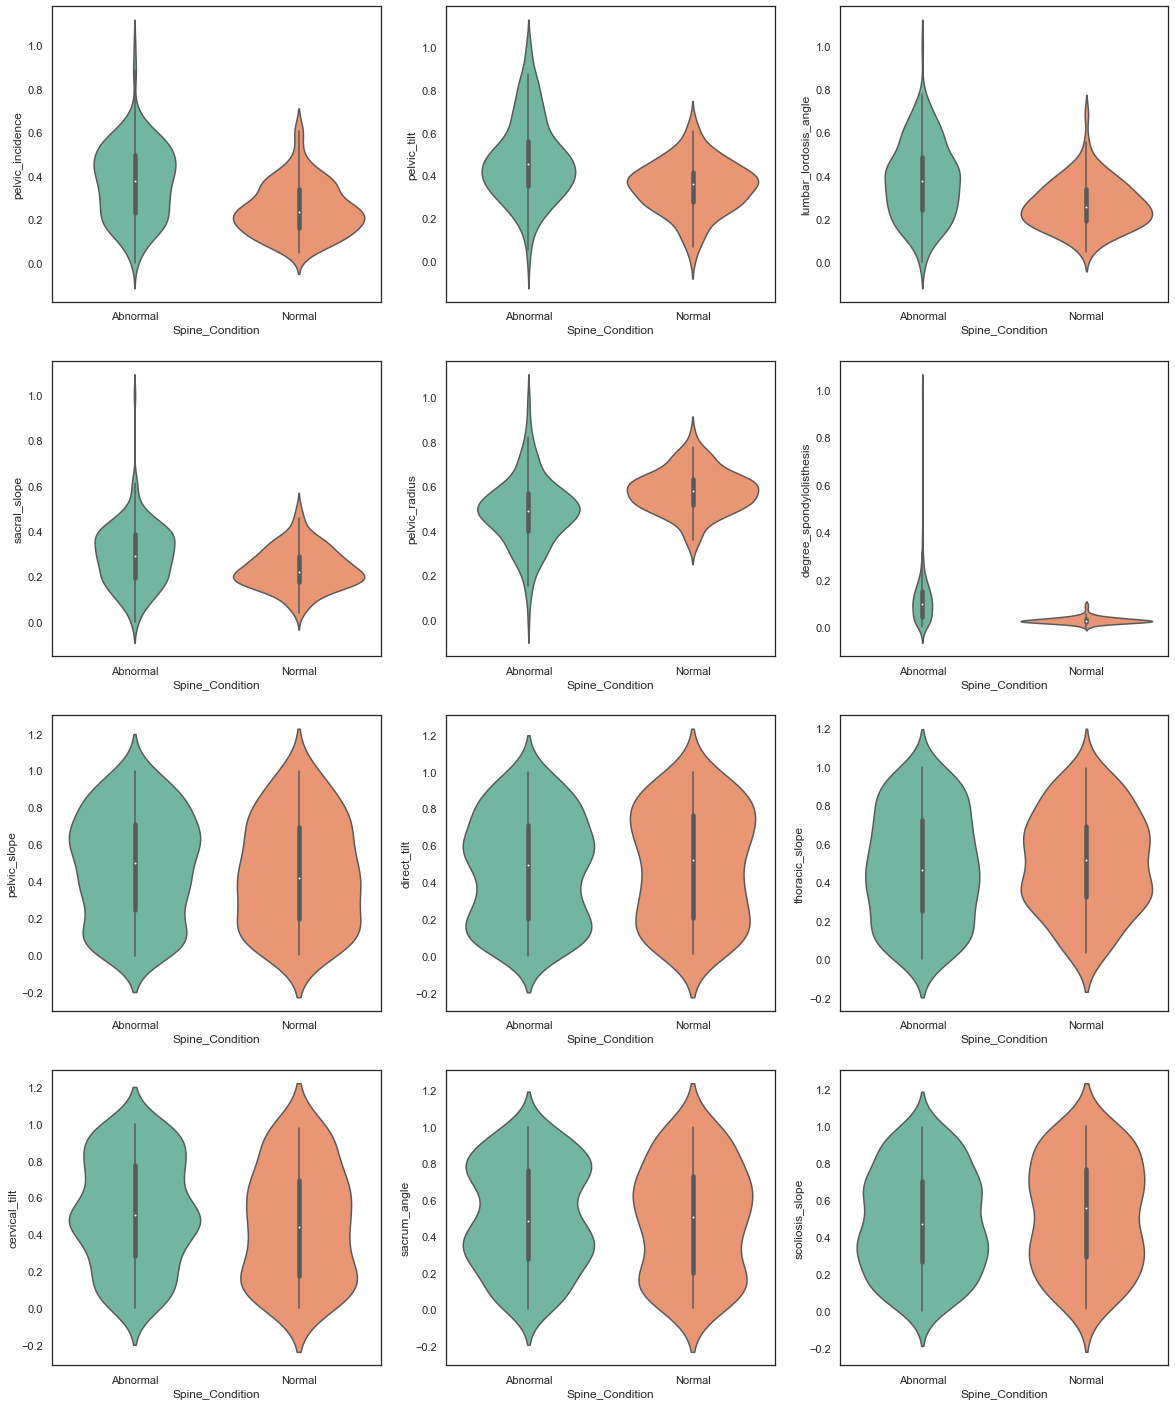

In [35]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set2')

sns.violinplot( data=df ,ax=ax[0][0], x ='Spine_Condition', orient='v',y ='pelvic_incidence')
sns.violinplot( data=df ,ax=ax[0][1], x ='Spine_Condition', orient='v',y ='pelvic_tilt')
sns.violinplot( data=df ,ax=ax[0][2], x ='Spine_Condition', orient='v',y ='lumbar_lordosis_angle')
sns.violinplot( data=df ,ax=ax[1][0], x ='Spine_Condition', orient='v',y ='sacral_slope')
sns.violinplot( data=df ,ax=ax[1][1], x ='Spine_Condition', orient='v',y ='pelvic_radius')
sns.violinplot( data=df ,ax=ax[1][2], x ='Spine_Condition', orient='v',y ='degree_spondylolisthesis')  
sns.violinplot( data=df ,ax=ax[2][0], x ='Spine_Condition', orient='v',y ='pelvic_slope')
sns.violinplot( data=df ,ax=ax[2][1], x ='Spine_Condition', orient='v',y ='direct_tilt')
sns.violinplot( data=df ,ax=ax[2][2], x ='Spine_Condition', orient='v',y ='thoracic_slope')
sns.violinplot( data=df ,ax=ax[3][0], x ='Spine_Condition', orient='v',y ='cervical_tilt')
sns.violinplot( data=df ,ax=ax[3][1], x ='Spine_Condition', orient='v',y ='sacrum_angle')
sns.violinplot( data=df ,ax=ax[3][2], x ='Spine_Condition', orient='v',y ='scoliosis_slope')

plt.show()

- **A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.**
- **outliers are present**

## Multivariate Analisis - pairplot 
## -------------------------------------------

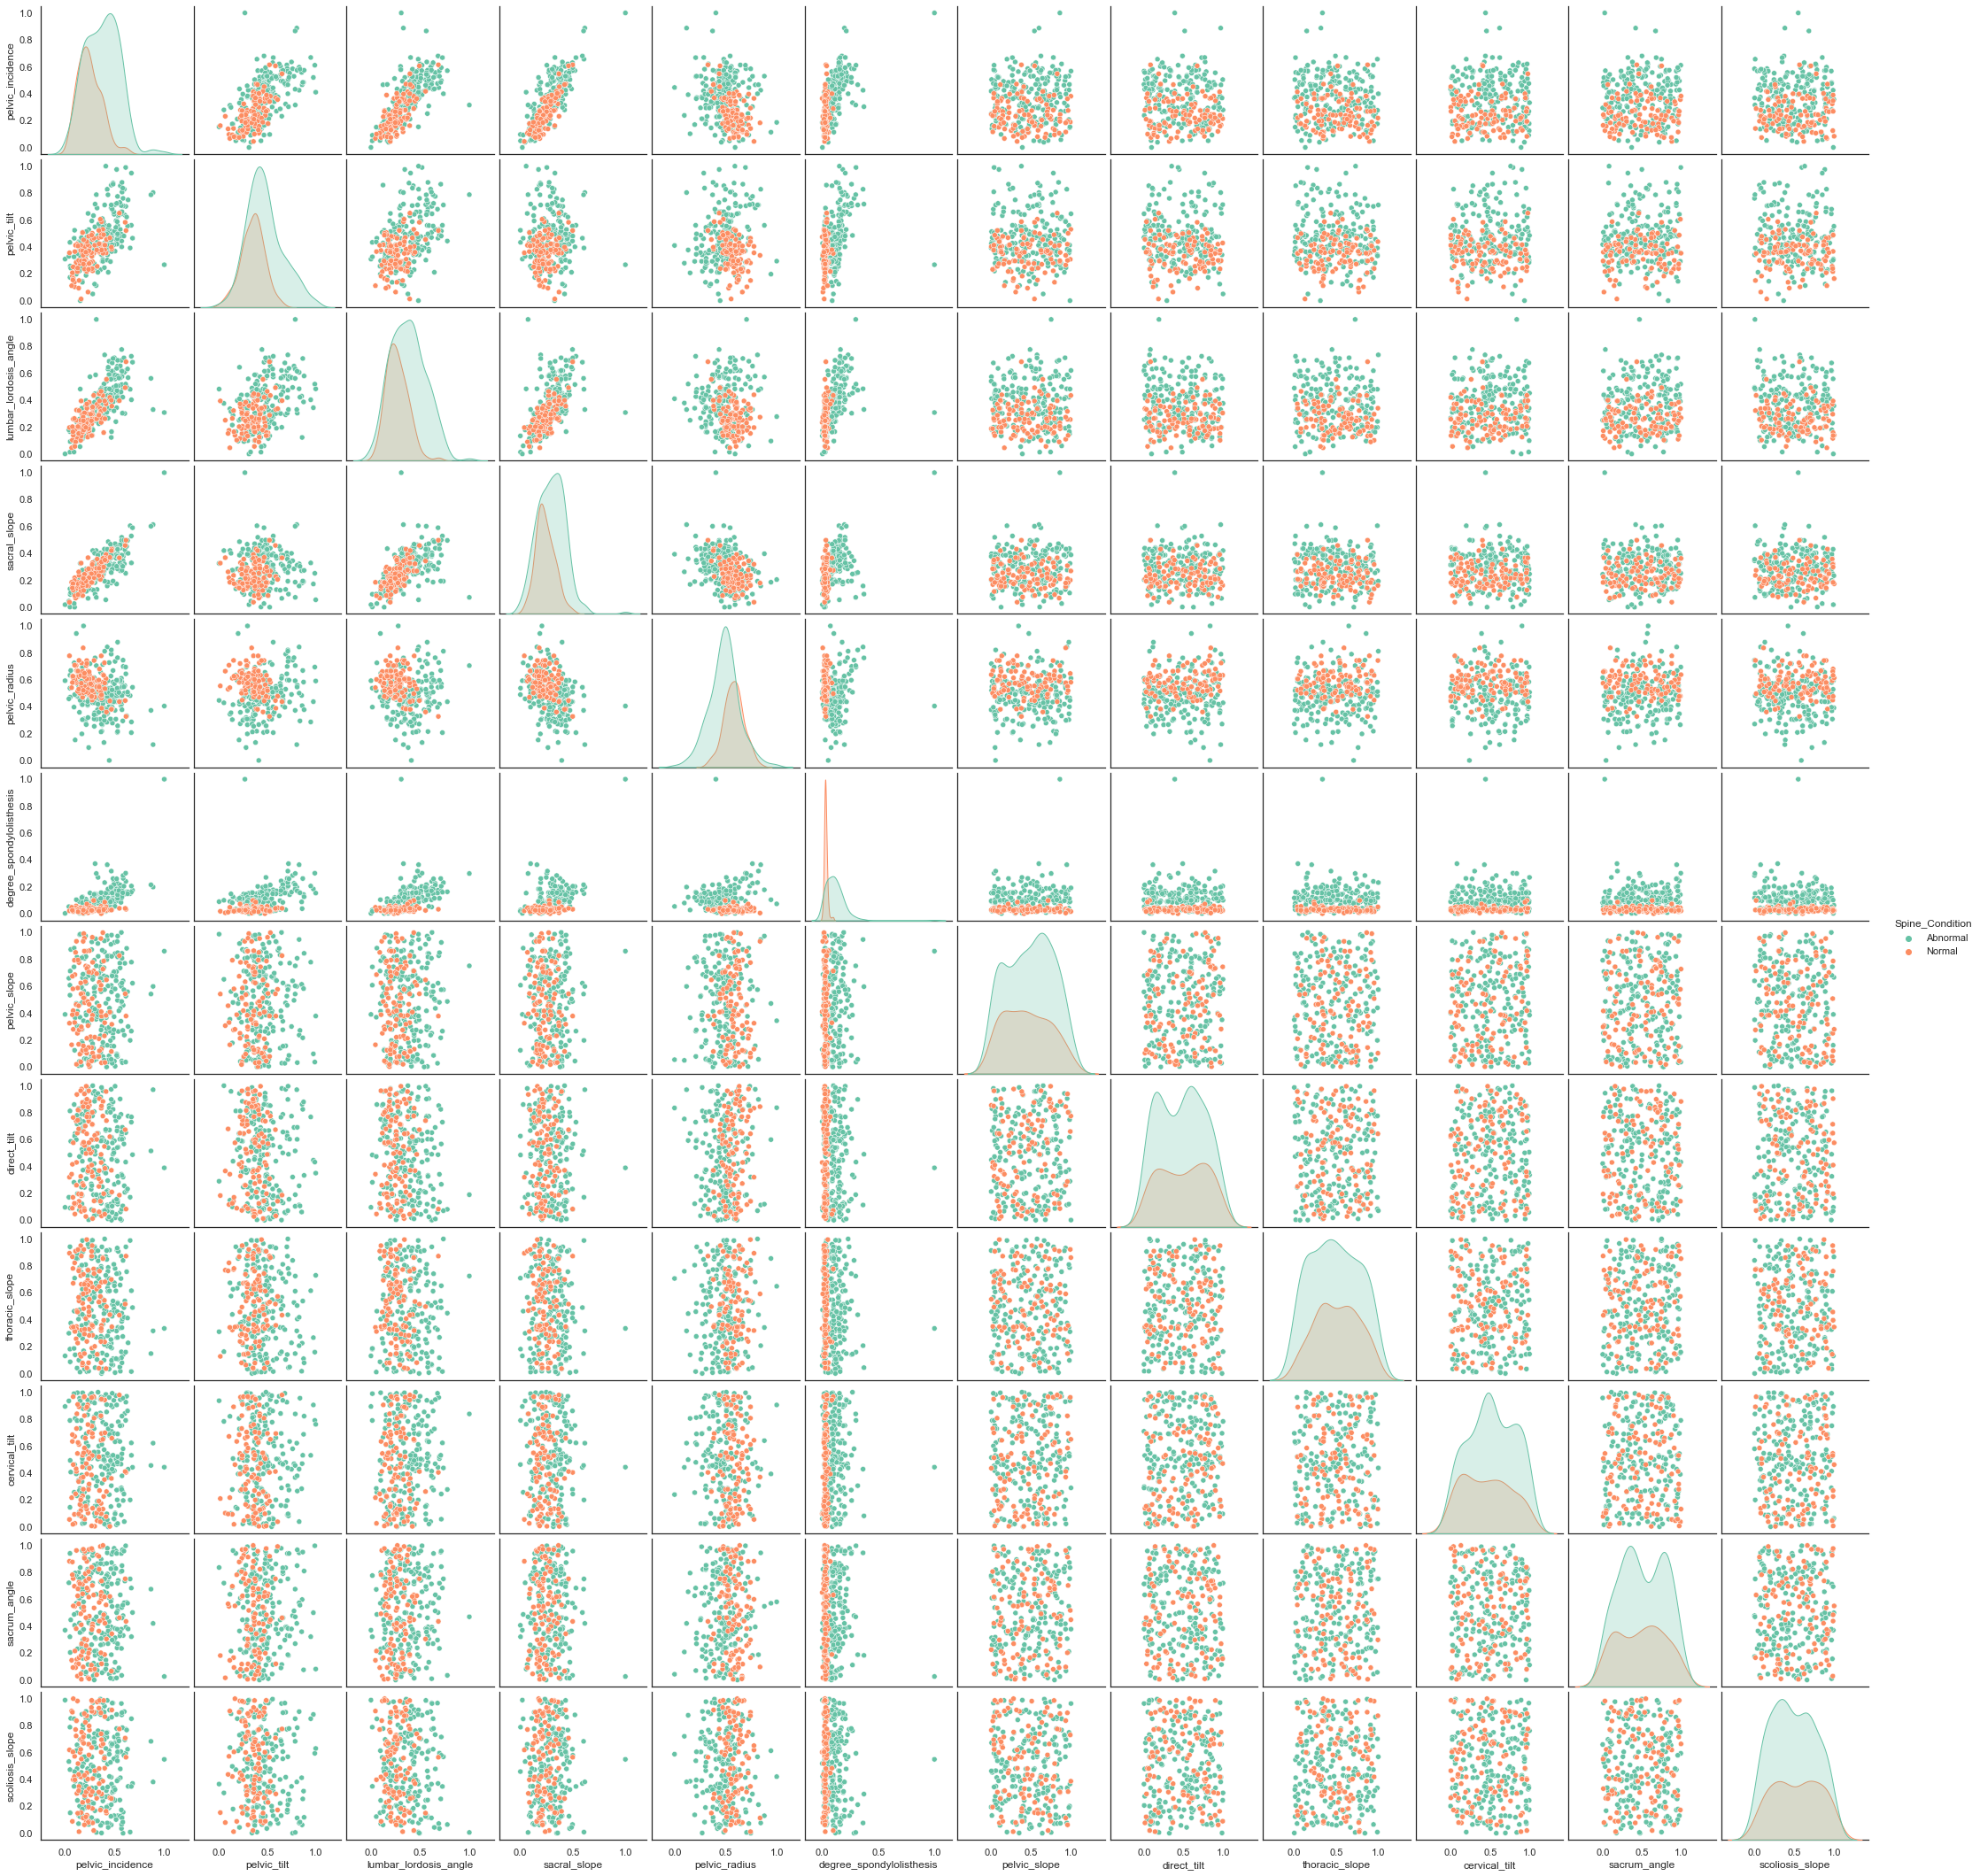

In [36]:
sns.pairplot(df ,hue='Spine_Condition',palette='Set2')
plt.show()

**From above pairplts there are only first 5 params that can help is classifing.
They are 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'.
Others, give mixed relations.**

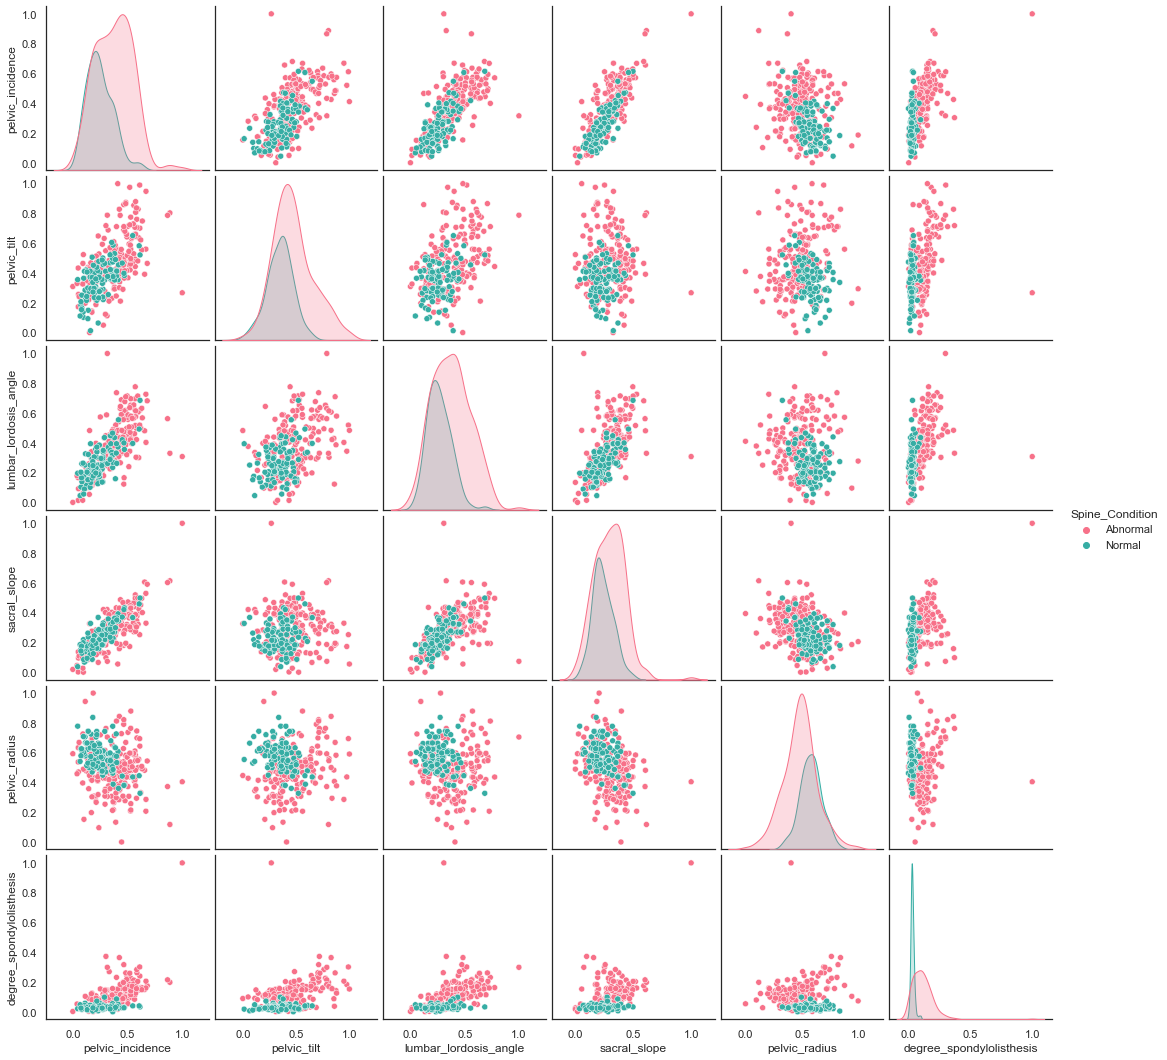

In [37]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
                 'degree_spondylolisthesis','Spine_Condition',]]

sns.set_style('white')
sns.pairplot(df_selected ,hue='Spine_Condition',palette='husl')
plt.show()

- **There are mainly first 6 parameters that can help is classifing.**
- **They are 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'.**
- **Others variables give mixed less significant relations.**

## Multivariate Analisis - heatmap
## --------------------------------------------

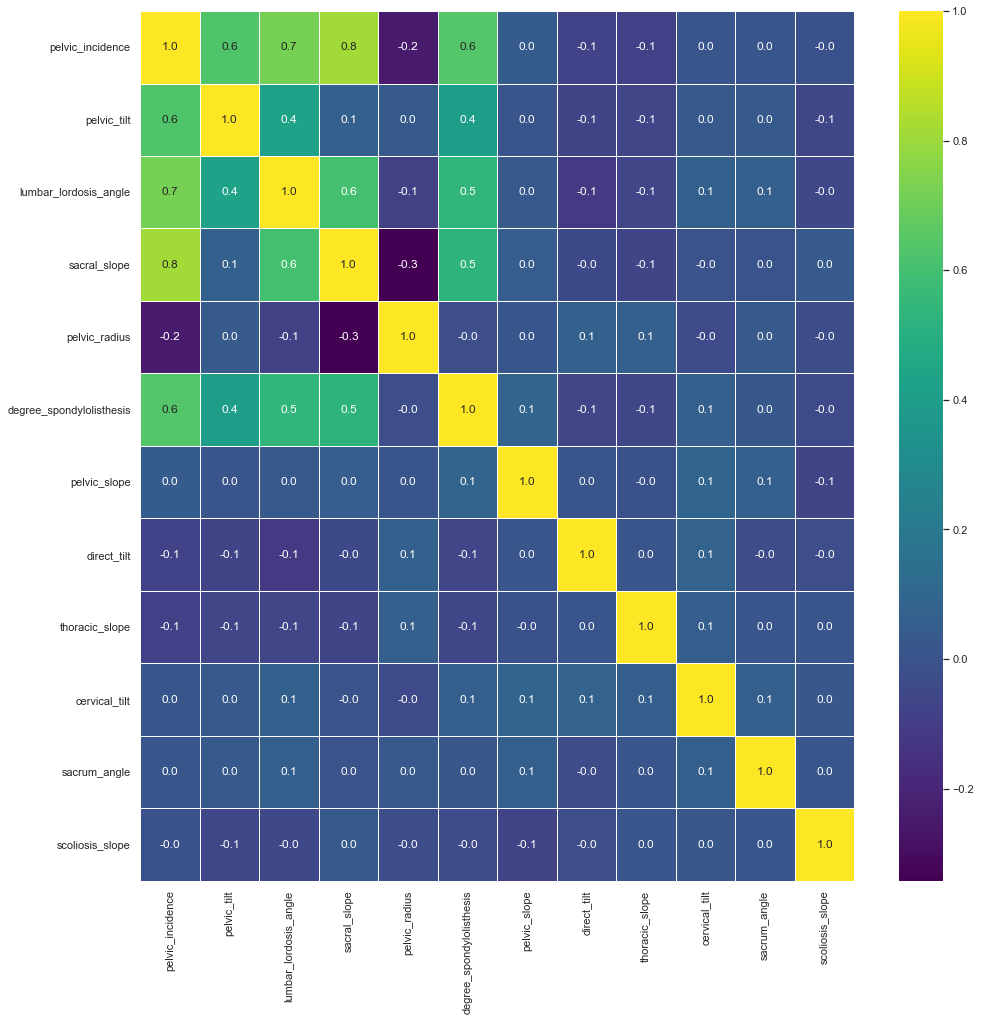

In [38]:
plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')
plt.show()

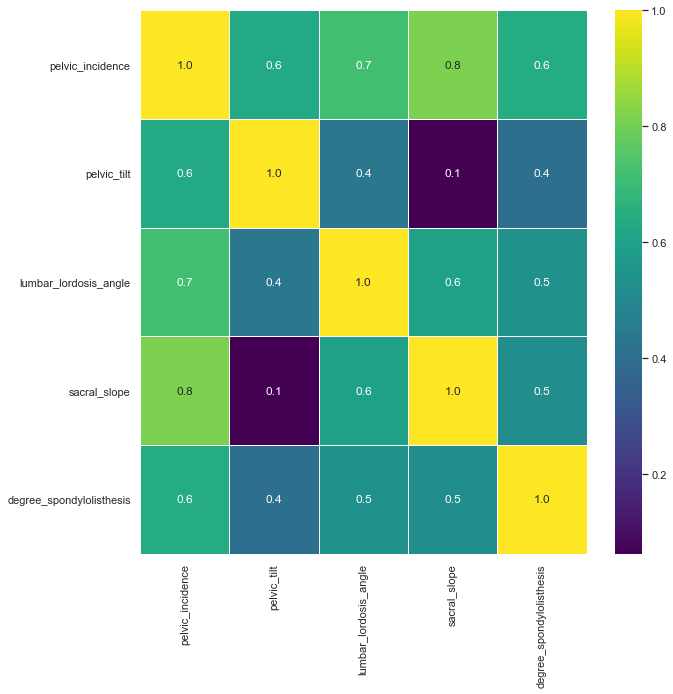

In [39]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',
                 'degree_spondylolisthesis','Spine_Condition',]]

plt.subplots(figsize=(10,10))
sns.heatmap(df_selected.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')
plt.show()

## Statistical Overview --------------------------------------------------------------------------------------------

## 5 number  statistical summary of numeric-typed columns

In [40]:
print('5 number  statistical summary of numeric-typed columns')
print('======================================================')
scaled_df.describe()

5 number  statistical summary of numeric-typed columns


pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean           0.331276     0.430419               0.339450      0.273794   
std            0.166237     0.178762               0.166043      0.124216   
min            0.000000     0.000000               0.000000      0.000000   
25%            0.195613     0.307608               0.205831      0.184895   
50%            0.313862     0.409251               0.318253      0.268714   
75%            0.450685     0.512180               0.438509      0.363946   
max            1.000000     1.000000               1.000000      1.000000   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean        0.514452                  0.086952      0.471832     0.481023   
std         0.143215                  0.087428      0.287048     0.290724   
min         0.000000                  0.000000      0.000000     0.000000   
25%         0.436900                  0.029474      0.222123     0.202827   
50%         0.518189                  0.053133      0.474855     0.500730   
75%         0.595613                  0.121847      0.704722     0.737865   
max         1.000000                  1.000000      1.000000     1.000000   

       thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
count      310.000000     310.000000    310.000000       310.000000  
mean         0.490527       0.500764      0.502473         0.499235  
std          0.276710       0.295518      0.289298         0.279926  
min          0.000000       0.000000      0.000000         0.000000  
25%          0.275105       0.256427      0.260246         0.272710  
50%          0.480266       0.502859      0.488992         0.480109  
75%          0.720461       0.749831      0.752264         0.722457  
max          1.000000       1.000000      1.000000         1.000000

## summary of oject-typed column

In [41]:
print('summary of oject-typed columns')
print('==============================')
df.describe(include =['O'])

summary of oject-typed columns


Spine_Condition
count              310
unique               2
top           Abnormal
freq               210

## Normal v/s Abnormal ( mean,varience,standard deviation,median )

In [42]:
SpineCondition_summary = df.groupby('Spine_Condition')
SpineCondition_summary.mean().reset_index()

Spine_Condition  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0        Abnormal          0.371743     0.470576               0.375197   
1          Normal          0.246295     0.346088               0.264381   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.291817       0.483879                  0.113677      0.482880   
1      0.235946       0.578655                  0.030830      0.448631   

   direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.473094        0.481118       0.521132      0.507832         0.485867  
1     0.497676        0.510285       0.457989      0.491219         0.527307

- The mean is the average or the most common value in a collection of numbers.It is also referred to as an expected value.
- In statistics, it is a measure of central tendency of a probability distribution along median and mode. 
- **for all columns mean of abnormal is high compared to others so abnormal is prominent in dataset.**

In [43]:
SpineCondition_summary = df.groupby('Spine_Condition')
SpineCondition_summary.var().reset_index()

Spine_Condition  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0        Abnormal          0.029016     0.035279               0.030985   
1          Normal          0.014229     0.014659               0.012238   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.018043       0.022962                  0.008974      0.082704   
1      0.007932       0.009397                  0.000216      0.081777   

   direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.082787        0.081931       0.084644      0.081035         0.075270  
1     0.088621        0.065437       0.091158      0.089963         0.084496

- The variance measures the average degree to which each point differs from the mean (the average) of all data points.

In [44]:
SpineCondition_summary = df.groupby('Spine_Condition')
SpineCondition_summary.std().reset_index()

Spine_Condition  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0        Abnormal          0.170342     0.187828               0.176025   
1          Normal          0.119285     0.121073               0.110624   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.134325       0.151531                  0.094731      0.287583   
1      0.089059       0.096939                  0.014682      0.285967   

   direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.287727        0.286237       0.290936      0.284666         0.274353  
1     0.297692        0.255808       0.301924      0.299938         0.290681

- Standard deviation looks at how spread out a group of numbers is from the mean, by looking at the square root of the variance. 
- A low standard deviation means that the data is very closely related to the average, thus very reliable. 
- A high standard deviation means that there is a large variance between the data and the statistical average, and is not as reliable.

In [45]:
SpineCondition_summary = df.groupby('Spine_Condition')
SpineCondition_summary.median().reset_index()

Spine_Condition  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0        Abnormal          0.377360     0.452854               0.377207   
1          Normal          0.231229     0.357895               0.256294   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.289394       0.490037                  0.100104      0.500258   
1      0.219250       0.578478                  0.028424      0.417345   

   direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.495462        0.466560       0.504892      0.482621         0.468791  
1     0.517806        0.518627       0.439217      0.504329         0.555002

## Covarience

In [46]:
df.cov()

pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  0.027635     0.018698   
pelvic_tilt                       0.018698     0.031956   
lumbar_lordosis_angle             0.019799     0.012845   
sacral_slope                      0.016828     0.001384   
pelvic_radius                    -0.005892     0.000836   
degree_spondylolisthesis          0.009283     0.006218   
pelvic_slope                      0.002066     0.000454   
direct_tilt                      -0.003790    -0.003748   
thoracic_slope                   -0.004128    -0.003136   
cervical_tilt                     0.000823     0.001528   
sacrum_angle                      0.000925     0.001699   
scoliosis_slope                  -0.000337    -0.002830   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.019799      0.016828      -0.005892   
pelvic_tilt                            0.012845      0.001384       0.000836   
lumbar_lordosis_angle                  0.027570      0.012342      -0.001911   
sacral_slope                           0.012342      0.015430      -0.006086   
pelvic_radius                         -0.001911     -0.006086       0.020511   
degree_spondylolisthesis               0.007747      0.005686      -0.000326   
pelvic_slope                           0.001405      0.001747       0.000648   
direct_tilt                           -0.005452     -0.001694       0.002641   
thoracic_slope                        -0.002921     -0.002336       0.002397   
cervical_tilt                          0.003134     -0.000002      -0.001684   
sacrum_angle                           0.002748      0.000007       0.001232   
scoliosis_slope                       -0.002280      0.001142      -0.001208   

                          degree_spondylolisthesis  pelvic_slope  direct_tilt  \
pelvic_incidence                          0.009283      0.002066    -0.003790   
pelvic_tilt                               0.006218      0.000454    -0.003748   
lumbar_lordosis_angle                     0.007747      0.001405    -0.005452   
sacral_slope                              0.005686      0.001747    -0.001694   
pelvic_radius                            -0.000326      0.000648     0.002641   
degree_spondylolisthesis                  0.007644      0.002156    -0.001622   
pelvic_slope                              0.002156      0.082397     0.001059   
direct_tilt                              -0.001622      0.001059     0.084521   
thoracic_slope                           -0.001386     -0.000935     0.000795   
cervical_tilt                             0.001462      0.007466     0.006249   
sacrum_angle                              0.000582      0.005044    -0.003148   
scoliosis_slope                          -0.001004     -0.005937    -0.001955   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.004128       0.000823      0.000925   
pelvic_tilt                    -0.003136       0.001528      0.001699   
lumbar_lordosis_angle          -0.002921       0.003134      0.002748   
sacral_slope                   -0.002336      -0.000002      0.000007   
pelvic_radius                   0.002397      -0.001684      0.001232   
degree_spondylolisthesis       -0.001386       0.001462      0.000582   
pelvic_slope                   -0.000935       0.007466      0.005044   
direct_tilt                     0.000795       0.006249     -0.003148   
thoracic_slope                  0.076568       0.004289      0.000909   
cervical_tilt                   0.004289       0.087331      0.004912   
sacrum_angle                    0.000909       0.004912      0.083693   
scoliosis_slope                 0.000739       0.001757      0.001242   

                          scoliosis_slope  
pelvic_incidence                -0.000337  
pelvic_tilt                     -0.002830  
lumbar_lordosis_angle           -0.002280  
sacral_slope                     0.00

- Covariance tells whether both variables vary in the same direction (positive covariance) or in the opposite direction (negative covariance). Lie between -infinity and +infinity
- In the study of covariance only sign matters. 

## Correlation

In [47]:
df.corr()

pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   
pelvic_slope                      0.043290     0.008852   
direct_tilt                      -0.078411    -0.072119   
thoracic_slope                   -0.089740    -0.063394   
cervical_tilt                     0.016750     0.028931   
sacrum_angle                      0.019240     0.032859   
scoliosis_slope                  -0.007251    -0.056550   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   
pelvic_slope                           0.029486      0.048988       0.015767   
direct_tilt                           -0.112939     -0.046914       0.063433   
thoracic_slope                        -0.063582     -0.067968       0.060477   
cervical_tilt                          0.063875     -0.000063      -0.039800   
sacrum_angle                           0.057199      0.000207       0.029738   
scoliosis_slope                       -0.049054      0.032853      -0.030145   

                          degree_spondylolisthesis  pelvic_slope  direct_tilt  \
pelvic_incidence                          0.638743      0.043290    -0.078411   
pelvic_tilt                               0.397862      0.008852    -0.072119   
lumbar_lordosis_angle                     0.533667      0.029486    -0.112939   
sacral_slope                              0.523557      0.048988    -0.046914   
pelvic_radius                            -0.026065      0.015767     0.063433   
degree_spondylolisthesis                  1.000000      0.085925    -0.063812   
pelvic_slope                              0.085925      1.000000     0.012694   
direct_tilt                              -0.063812      0.012694     1.000000   
thoracic_slope                           -0.057286     -0.011770     0.009887   
cervical_tilt                             0.056576      0.088017     0.072738   
sacrum_angle                              0.023021      0.060743    -0.037428   
scoliosis_slope                          -0.041023     -0.073893    -0.024021   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.089740       0.016750      0.019240   
pelvic_tilt                    -0.063394       0.028931      0.032859   
lumbar_lordosis_angle          -0.063582       0.063875      0.057199   
sacral_slope                   -0.067968      -0.000063      0.000207   
pelvic_radius                   0.060477      -0.039800      0.029738   
degree_spondylolisthesis       -0.057286       0.056576      0.023021   
pelvic_slope                   -0.011770       0.088017      0.060743   
direct_tilt                     0.009887       0.072738     -0.037428   
thoracic_slope                  1.000000       0.052451      0.011354   
cervical_tilt                   0.052451       1.000000      0.057451   
sacrum_angle                    0.011354       0.057451      1.000000   
scoliosis_slope                 0.009541       0.021243      0.015337   

                          scoliosis_slope  
pelvic_incidence                -0.007251  
pelvic_tilt                     -0.056550  
lumbar_lordosis_angle           -0.049054  
sacral_slope                     0.03

- Here correlation between 	pelvic_incidence and pelvic_tilt = 0.629199
- i.e,They are directly proportional to each other.**They vary in the same direction with the factor of 0.629199**

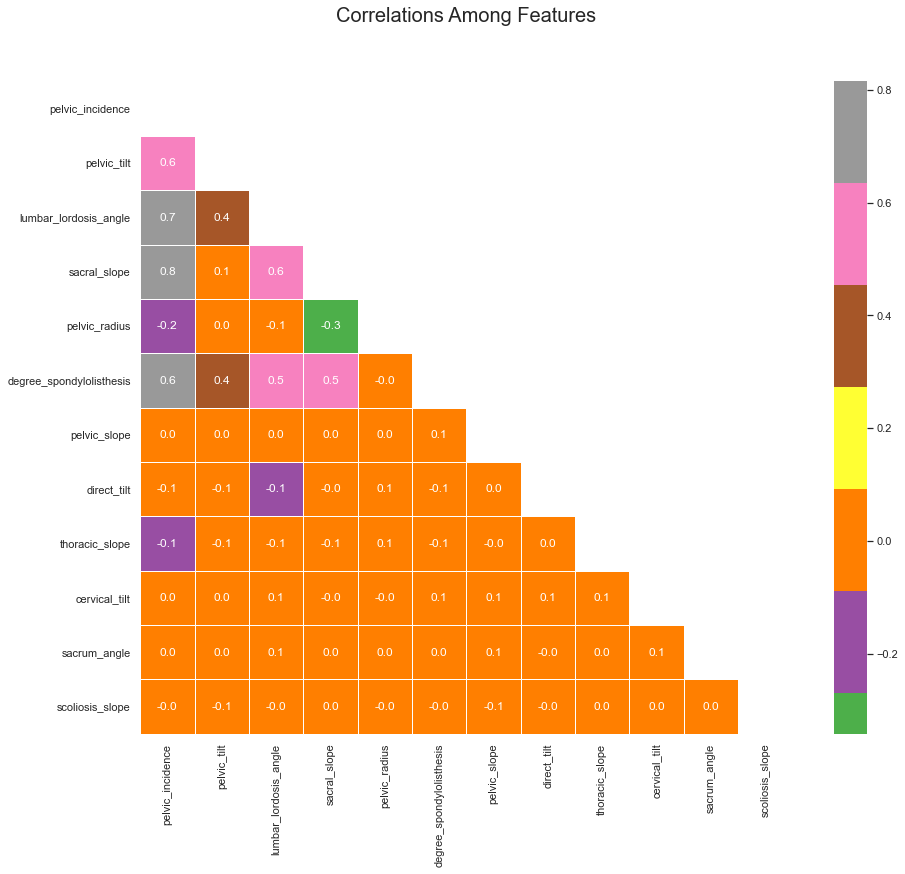

In [48]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask, cmap = 'Set1',linewidths=.5, fmt= '.1f',center = 0,square=True)

plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## Feature selection - using correlation matrix
## --------------------------------------------------------------

In [49]:
correlation = df.corr()
relevant_features_correlation =  correlation[correlation >0.5]
relevant_features_correlation

pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282          NaN   
sacral_slope                      0.814960          NaN   
pelvic_radius                          NaN          NaN   
degree_spondylolisthesis          0.638743          NaN   
pelvic_slope                           NaN          NaN   
direct_tilt                            NaN          NaN   
thoracic_slope                         NaN          NaN   
cervical_tilt                          NaN          NaN   
sacrum_angle                           NaN          NaN   
scoliosis_slope                        NaN          NaN   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960            NaN   
pelvic_tilt                                 NaN           NaN            NaN   
lumbar_lordosis_angle                  1.000000      0.598387            NaN   
sacral_slope                           0.598387      1.000000            NaN   
pelvic_radius                               NaN           NaN            1.0   
degree_spondylolisthesis               0.533667      0.523557            NaN   
pelvic_slope                                NaN           NaN            NaN   
direct_tilt                                 NaN           NaN            NaN   
thoracic_slope                              NaN           NaN            NaN   
cervical_tilt                               NaN           NaN            NaN   
sacrum_angle                                NaN           NaN            NaN   
scoliosis_slope                             NaN           NaN            NaN   

                          degree_spondylolisthesis  pelvic_slope  direct_tilt  \
pelvic_incidence                          0.638743           NaN          NaN   
pelvic_tilt                                    NaN           NaN          NaN   
lumbar_lordosis_angle                     0.533667           NaN          NaN   
sacral_slope                              0.523557           NaN          NaN   
pelvic_radius                                  NaN           NaN          NaN   
degree_spondylolisthesis                  1.000000           NaN          NaN   
pelvic_slope                                   NaN           1.0          NaN   
direct_tilt                                    NaN           NaN          1.0   
thoracic_slope                                 NaN           NaN          NaN   
cervical_tilt                                  NaN           NaN          NaN   
sacrum_angle                                   NaN           NaN          NaN   
scoliosis_slope                                NaN           NaN          NaN   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence                     NaN            NaN           NaN   
pelvic_tilt                          NaN            NaN           NaN   
lumbar_lordosis_angle                NaN            NaN           NaN   
sacral_slope                         NaN            NaN           NaN   
pelvic_radius                        NaN            NaN           NaN   
degree_spondylolisthesis             NaN            NaN           NaN   
pelvic_slope                         NaN            NaN           NaN   
direct_tilt                          NaN            NaN           NaN   
thoracic_slope                       1.0            NaN           NaN   
cervical_tilt                        NaN            1.0           NaN   
sacrum_angle                         NaN            NaN           1.0   
scoliosis_slope                      NaN            NaN           NaN   

                          scoliosis_slope  
pelvic_incidence                      NaN  
pelvic_tilt                           NaN  
lumbar_lordosis_angle                 NaN  
sacral_slope                         

### --------------------------------------------------------------------------------------------------------------------------------------------------------
## From this we can see that relevant_features are :-
## - pelvic_incidence
## - pelvic_tilt
## - lumbar_lordosis_angle
## - sacral_slope
## - degree_spondylolisthesis
### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Outlier - Boxplot for finding ouiliers
## ----------------------------------------------------

- One method for determining outliers is based on the quartiles of a data set. 
- Quartiles are values that partition the data set into four groups, each containing 25% of the measurements. 
- The lower quartile is designated by **Q1 or QL**; the middle quartile is the **median**; the upper quartile is designated by **Q3 or QU.**
- Interquartile range (IQR) – the distance between the lower and upper quartiles. **IQR = QU – QL = Q3 – Q1**
- The middle 50% , those in the interquartile range, fall inside the box. The vertical lines emanating from the box are called whiskers. 

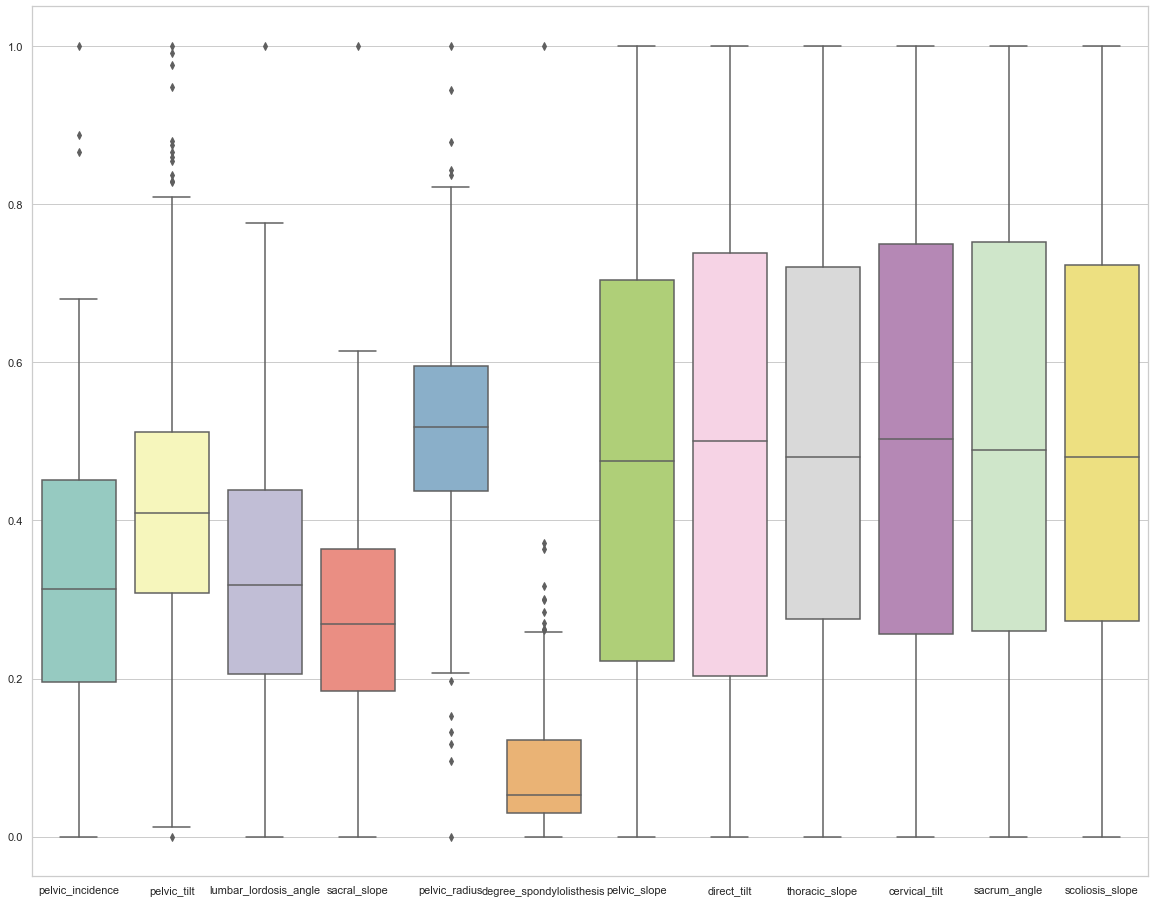

In [50]:
plt.figure(figsize=(20,16))
sns.boxplot(data=df,palette= "Set3")
plt.show()

## Boxplot of highly correlated features
## ------------------------------------------------------

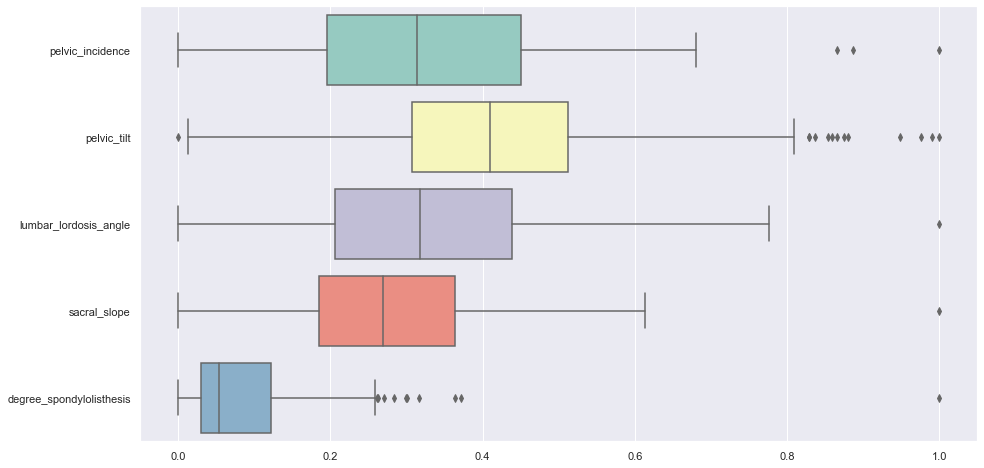

In [51]:
df0=df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis',
        'Spine_Condition']]

plt.figure(figsize=(15,8))
sns.set()
sns.boxplot(data=df0,palette= "Set3",orient="h")
plt.show()

## Outliers treatment
## ---------------------------

- **Values less than QL – 1.5(IQR) or  greater than QU + 1.5(IQR)** are identified as **potential outliers** because they are extreme values that represent relatively rare. 
- Values less thanQL – 3(IQR) or greater than QU + 3(IQR) are called outliers.

In [52]:
q1=df0.quantile(q=0.25) # the above output brief's about the df regarding the 25th percentile / 1st Quartile.
q2=df0.quantile(q=0.50) # the above output brief's about the df regarding the 50 th percentile / 2nd Quartile.
q3=df0.quantile(q=0.75) # the above output brief's about the df regarding the 75th percentile / 3rd Quartile.

In [53]:
# iqr (q3 -q1)
iqr = q3 - q1
print(iqr)

pelvic_incidence            0.255072
pelvic_tilt                 0.204572
lumbar_lordosis_angle       0.232678
sacral_slope                0.179051
degree_spondylolisthesis    0.092373
dtype: float64


In [54]:
## Outlier calculation , Q3+1.5IQR and Q1 + 1.5IQR 

Upper_limit =q3 + (1.5 * iqr)
Lower_limit =q1 - (1.5 * iqr)

print('Upper_limit')
print('------------ \n', Upper_limit)
print('======================================')
print('Lower_limit')
print('------------ \n', Lower_limit)

Upper_limit
------------ 
 pelvic_incidence            0.833293
pelvic_tilt                 0.819038
lumbar_lordosis_angle       0.787526
sacral_slope                0.632523
degree_spondylolisthesis    0.260407
dtype: float64
Lower_limit
------------ 
 pelvic_incidence           -0.186994
pelvic_tilt                 0.000751
lumbar_lordosis_angle      -0.143186
sacral_slope               -0.083683
degree_spondylolisthesis   -0.109086
dtype: float64


### Remove Outlier

In [55]:
df1 = df0[(df0["pelvic_incidence"] > Lower_limit["pelvic_incidence"])
             & (df0["pelvic_incidence"] < Upper_limit["pelvic_incidence"])]

df0.shape[0] - df1.shape[0]

3

In [56]:
df2 = df1[(df1["pelvic_tilt"] > Lower_limit["pelvic_tilt"])
             & (df1["pelvic_tilt"] < Upper_limit["pelvic_tilt"])]

df1.shape[0] - df2.shape[0]

13

In [57]:
df3 = df2[(df2["lumbar_lordosis_angle"] > Lower_limit["lumbar_lordosis_angle"])
             & (df2["lumbar_lordosis_angle"] < Upper_limit["lumbar_lordosis_angle"])]

df2.shape[0] - df3.shape[0]

1

In [58]:
df4 = df3[(df3["sacral_slope"] > Lower_limit["sacral_slope"])
             & (df3["sacral_slope"] < Upper_limit["sacral_slope"])]

df3.shape[0] - df4.shape[0]

0

In [59]:
df_final = df4[(df4["degree_spondylolisthesis"] > Lower_limit["degree_spondylolisthesis"])
             & (df4["degree_spondylolisthesis"] < Upper_limit["degree_spondylolisthesis"])]

df4.shape[0] - df_final.shape[0]

5

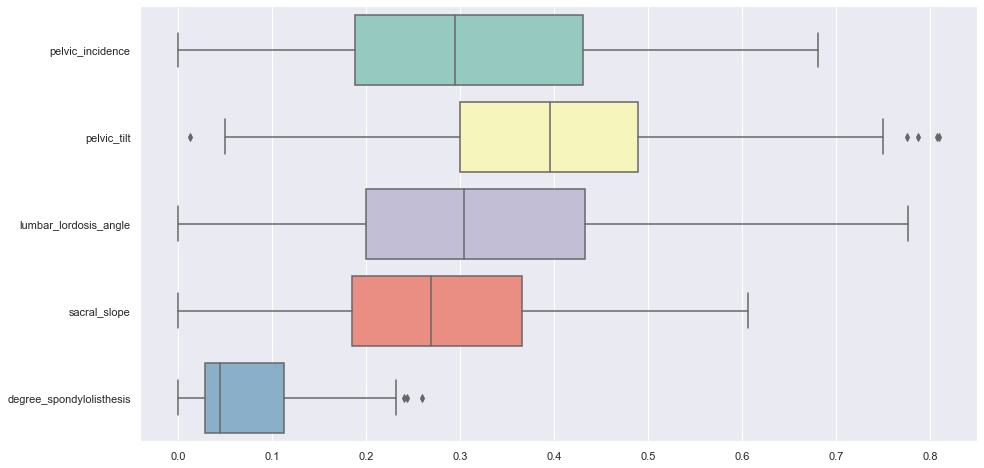

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_final, palette= "Set3",orient="h")
plt.show()

###  A few number of outliers still preset. But it is close to IQR. so we can neglect them because there is a chance for them to be true value.

In [61]:
df_final.shape[0]

288

In [62]:
df_final['Spine_Condition'].value_counts()*100.0 /len(df)

Abnormal    60.645161
Normal      32.258065
Name: Spine_Condition, dtype: float64

- **Dataset is not imbalanced.**

In [63]:
df_final.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   
2          0.411666     0.513932               0.322995      0.307661   
3          0.416151     0.557414               0.271260      0.289436   
4          0.227272     0.289479               0.128129      0.247022   

   degree_spondylolisthesis Spine_Condition  
0                  0.025148        Abnormal  
1                  0.036365        Abnormal  
2                  0.017523        Abnormal  
3                  0.051838        Abnormal  
4                  0.044173        Abnormal

### Converting catagorical data to numeric before model building
### -----------------------------------------------------------------------------------------

In [64]:
df_final['Spine_Condition'] =df_final['Spine_Condition'].map({'Abnormal': 0, 'Normal': 1}).astype(int)
df_final.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   degree_spondylolisthesis  Spine_Condition  
0                  0.025148                0  
1                  0.036365                0

## Scaling using StandardScaler ------------------------------------------------------------------------------------------

- The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. This will increase accuracy.

In [65]:
X=df_final[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis']]
y=df_final['Spine_Condition']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled_data, columns = X.columns)
X_scaled.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.264522     0.789374              -0.623128     -0.180492   
1         -1.251939    -0.744388              -1.431298     -1.102302   
2          0.631712     0.748351              -0.042598      0.312428   
3          0.661128     1.047255              -0.362735      0.154280   
4         -0.577818    -0.794596              -1.248439     -0.213773   

   degree_spondylolisthesis  
0                 -0.848969  
1                 -0.656263  
2                 -0.979979  
3                 -0.390428  
4                 -0.522121

# Model building -----------------------------------------------------------------------------------

In [67]:
X=X_scaled
y=df_final['Spine_Condition']

### Train Test split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
print('No of rows in X = ',X.shape[0])
print('No of rows in X_train = ',X_train.shape[0])
print('No of rows in X_test = ',X_test.shape[0])
print('-------------------------------')
print('No of rows in y = ',y.shape[0])
print('No of rows in y_train = ',y_train.shape[0])
print('No of rows in y_test = ',y_test.shape[0])

No of rows in X =  288
No of rows in X_train =  201
No of rows in X_test =  87
-------------------------------
No of rows in y =  288
No of rows in y_train =  201
No of rows in y_test =  87


## Model 1 : LogisticRegression -------------------------------------------------------------------------------------------

In [70]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C=1)

logReg_model=logReg.fit(X_train, y_train)

# predict class
logReg_y_pred = logReg.predict(X_test)

logReg_train_score = logReg_model.score(X_train, y_train)
logReg_test_score  = logReg_model.score(X_test, y_test)

print("LogisticRegression :- ")
print ("Training Score: {}\nTest Score: {}" .format(logReg_train_score, logReg_test_score))

LogisticRegression :- 
Training Score: 0.8258706467661692
Test Score: 0.8045977011494253


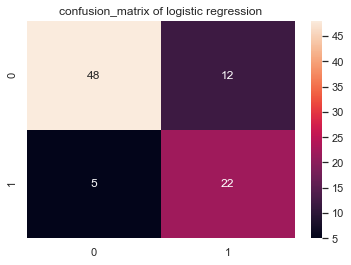

In [71]:
from sklearn.metrics import confusion_matrix
plt.title('confusion_matrix of logistic regression')
sns.heatmap(confusion_matrix(y_test,logReg_y_pred ),annot=True,fmt="d")
plt.show()

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test,logReg_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, logReg_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.65      0.81      0.72        27

    accuracy                           0.80        87
   macro avg       0.78      0.81      0.79        87
weighted avg       0.83      0.80      0.81        87



0.8045977011494253

## Model 2 : Gaussian Naive Bayes model ------------------------------------------------------------------------------

In [73]:
#Fit Naive Bayes model (Skip MultinomialNB when some of the features have negative values. Use GaussianNB instead.)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb_model = gnb.fit(X_train,y_train)

gnb_y_pred = gnb.predict(X_test)

gnb_train_score = gnb_model.score(X_train, y_train)
gnb_test_score  = gnb_model.score(X_test, y_test)

print("Naive Bayes Model:- ")
print ("Training Score: {}\nTest Score: {}" .format(gnb_train_score, gnb_test_score))

Naive Bayes Model:- 
Training Score: 0.7761194029850746
Test Score: 0.7011494252873564


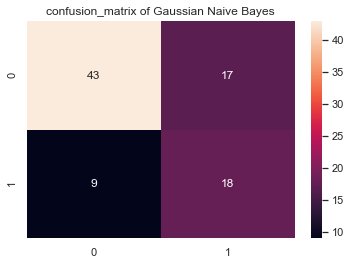

In [74]:
plt.title('confusion_matrix of Gaussian Naive Bayes')
sns.heatmap(confusion_matrix(y_test,gnb_y_pred ),annot=True,fmt="d")
plt.show()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,gnb_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, gnb_y_pred)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        60
           1       0.51      0.67      0.58        27

    accuracy                           0.70        87
   macro avg       0.67      0.69      0.67        87
weighted avg       0.73      0.70      0.71        87



0.7011494252873564

## Model 3: DecisionTreeClassifier --------------------------------------------------------------------------------------

In [76]:
from sklearn.tree import DecisionTreeClassifier  
dtree = DecisionTreeClassifier()

dtree_model= dtree.fit(X_train,y_train)

dtree_y_pred = dtree.predict(X_test)

dtree_train_score = dtree_model.score(X_train, y_train)
dtree_test_score  = dtree_model.score(X_test, y_test)

print("DecisionTreeClassifier :- ")
print ("Training Score: {}\nTest Score: {}" .format(dtree_train_score, dtree_test_score))


DecisionTreeClassifier :- 
Training Score: 1.0
Test Score: 0.7931034482758621


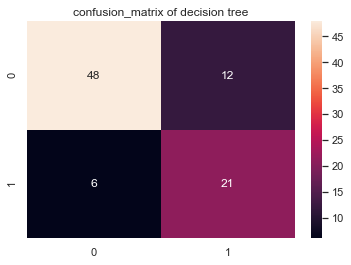

In [77]:
plt.title('confusion_matrix of decision tree')
sns.heatmap(confusion_matrix(y_test,dtree_y_pred ),annot=True,fmt="d")
plt.show()

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtree_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, dtree_y_pred)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        60
           1       0.64      0.78      0.70        27

    accuracy                           0.79        87
   macro avg       0.76      0.79      0.77        87
weighted avg       0.81      0.79      0.80        87



0.7931034482758621

## Model 4: SVC ------------------------------------------------------------------------------------------------------------------

In [79]:
#Fit SVM model - does not do as good probably bc SVM are better when there are alot of features 
from sklearn.svm import SVC

svcclassifier = SVC(kernel = 'linear', random_state = 1)

svc_model = svcclassifier.fit(X_train, y_train)

svc_y_pred = svc_model.predict(X_test)

svc_train_score = svc_model.score(X_train, y_train)
svc_test_score  = svc_model.score(X_test, y_test)

print("SVM Model:- ")
print ("Training Score: {}\nTest Score: {}" .format(svc_train_score, svc_test_score))

SVM Model:- 
Training Score: 0.8208955223880597
Test Score: 0.8275862068965517


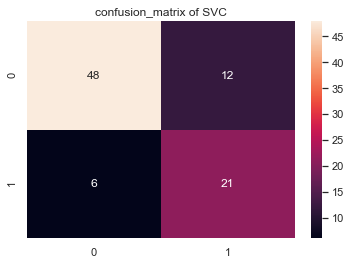

In [80]:
plt.title('confusion_matrix of SVC')
sns.heatmap(confusion_matrix(y_test,dtree_y_pred ),annot=True,fmt="d")
plt.show()

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,svc_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, svc_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        60
           1       0.69      0.81      0.75        27

    accuracy                           0.83        87
   macro avg       0.80      0.82      0.81        87
weighted avg       0.84      0.83      0.83        87



0.8275862068965517

## Model 5 : SVC Tunning using GridSearchCv ---------------------------------------------------------------------

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train)

grid.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 500, 'gamma': 0.001}

#### {'C': 500, 'gamma': 0.001}

In [83]:
svc_model_tunned = SVC(C=500, gamma=0.001)
svc_model_tunned.fit(X_train,y_train)

GridSearchCV_y_pred = svc_model_tunned.predict(X_test)

svc_tunned_train_score = svc_model_tunned.score(X_train, y_train)
svc_tunned_test_score  = svc_model_tunned.score(X_test, y_test)

print("SVM Model tunned:- ")
print ("Training Score: {}\nTest Score: {}" .format(svc_tunned_train_score, svc_tunned_test_score))

SVM Model tunned:- 
Training Score: 0.8208955223880597
Test Score: 0.8045977011494253


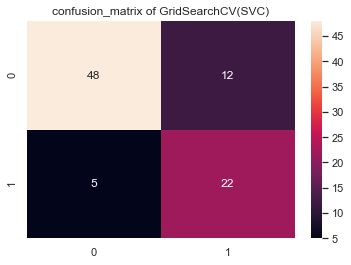

In [84]:
plt.title('confusion_matrix of GridSearchCV(SVC)')
sns.heatmap(confusion_matrix(y_test,GridSearchCV_y_pred ),annot=True,fmt="d")
plt.show()

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,GridSearchCV_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, GridSearchCV_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.65      0.81      0.72        27

    accuracy                           0.80        87
   macro avg       0.78      0.81      0.79        87
weighted avg       0.83      0.80      0.81        87



0.8045977011494253

## Model 6 :K Nearest Neighbor model -------------------------------------------------------------------------------------

In [86]:
#Fit Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn_model = knn.fit(X_train,y_train)

knn_y_pred = knn_model.predict(X_test)

knn_train_score = knn_model.score(X_train, y_train)
knn_test_score  = knn_model.score(X_test, y_test)

print("K Nearest Neighbor Model:- ")
print ("Training Score: {}\nTest Score: {}" .format(knn_train_score, knn_test_score))

K Nearest Neighbor Model:- 
Training Score: 0.8905472636815921
Test Score: 0.7931034482758621


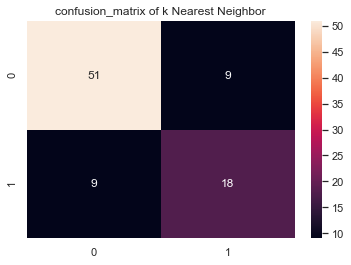

In [87]:
plt.title('confusion_matrix of k Nearest Neighbor')
sns.heatmap(confusion_matrix(y_test,knn_y_pred ),annot=True,fmt="d")
plt.show()

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,knn_y_pred))

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, knn_y_pred)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.67      0.67      0.67        27

    accuracy                           0.79        87
   macro avg       0.76      0.76      0.76        87
weighted avg       0.79      0.79      0.79        87



0.7931034482758621

## Selecting the final model ---------------------------------------------------------------------------------------------------

In [89]:
models=pd.DataFrame({'Model':['Logistic Regression','Gaussian Naive Bayes','Decision Tree','SVC','GridSearchCV(SVC)','knn'],
                    'Accuracy': [ logReg_test_score, gnb_test_score, dtree_test_score ,svc_test_score,
                                    svc_tunned_test_score,knn_test_score] })
models.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
3                   SVC  0.827586
0   Logistic Regression  0.804598
4     GridSearchCV(SVC)  0.804598
2         Decision Tree  0.793103
5                   knn  0.793103
1  Gaussian Naive Bayes  0.701149

(0.6, 1.0)

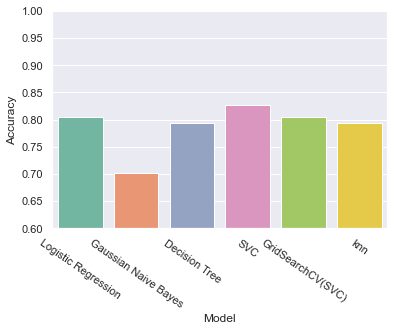

In [90]:
sns.barplot(x=models["Model"],y=models["Accuracy"],data=models,palette="Set2")
plt.xticks(rotation=-35)
plt.ylim(0.6, 1)

### SVC model has high accuracy.

# Get a new Data and predict Spine condition (Normal or Abnormal)---------------

In [91]:
pelvic_incidence = float(input('Enter the value of pelvic_incidence : '))
pelvic_tilt = float(input('Enter the value of pelvic_tilt : '))
lumbar_lordosis_angle = float(input('Enter the value of lumbar_lordosis_angle : '))
sacral_slope = float(input('Enter the value of sacral_slope : '))
degree_spondylolisthesis = float(input('Enter the value of degree_spondylolisthesis : '))

New_Data= [[pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis]]

New_Data_User = pd.DataFrame(New_Data, columns=[[pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,
                                                 sacral_slope,degree_spondylolisthesis]] )
                             
print("-----------------------------------------------------------------------------------")

print(New_Data_User.head())

user_classification =svc_model.predict(New_Data_User)

print("-----------------------------------------------------------------------------------")

print("Application status of new data user = ",user_classification)

print("-----------------------------------------------------------------------------------")

if (user_classification >= 1):
    print("Spine condition is normal")
else:
    print("Spine condition is Abnormal")

Enter the value of pelvic_incidence : 56
Enter the value of pelvic_tilt : 15
Enter the value of lumbar_lordosis_angle : 40
Enter the value of sacral_slope : 36
Enter the value of degree_spondylolisthesis : 20
-----------------------------------------------------------------------------------
   56.0  15.0  40.0  36.0  20.0
0  56.0  15.0  40.0  36.0  20.0
-----------------------------------------------------------------------------------
Application status of new data user =  [0]
-----------------------------------------------------------------------------------
Spine condition is Abnormal


# Saving the Model-------------------------------------------------------------------------------

In [93]:
import pickle

final_model = svc_model

pickle_file= open("Shareena_ML_B7_project_SpineDataset.pkl", "wb") 
pickle.dump(final_model, pickle_file) 

pickle_file.close()

# -------------------------------------------------------------------------------------------------------